In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Memuat dataset (DATA LOADING)

Dataset Test

In [3]:
import pandas as pd
test = pd.read_csv('test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

Dataset Train

In [4]:
train = pd.read_csv('train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Data Cleaning and Transformation

## Train.csv



### Memeriksa data pada Train.csv

Memeriksa tipe data pada Train.csv

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Analisis statistik deskriptif

In [6]:
train.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     91     1460        1460      1460  ...  1460.000000      7    281   
unique     2        4           4         2  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      50      925        1311      1459  ...          NaN      3    157   
mean     NaN      NaN         NaN       NaN  ...     2.758904    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    40.177307    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           54   1460.000000  1460.000000  1460.000000      1460   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            49           NaN          NaN          NaN      1267   
mean           NaN     43.489041     6.321918  2007.815753       NaN   
std            NaN    496.123024     2.703626     1.328095       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1460    1460.000000  
unique              6            NaN  
top            Normal            NaN  
freq             1198            NaN  
mean              NaN  180921.195890  
std               NaN   79442.502883  
min               NaN   34900.000000  
25%               NaN  129975.000000  
50%               NaN  163000.000000  
75%               NaN  214000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

Memeriksa jumlah nilai yang hilang di setiap kolom

In [7]:
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Data Cleaning

Memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%

In [8]:
less = missing_values[missing_values < 0.75*len(train)].index
more = missing_values[missing_values >= 0.75*len(train)].index

Mengisi nilai yang hilang dengan median untuk kolom numerik (pada missing value kurang dari 75%)

In [9]:
numeric_features = train[less].select_dtypes(include=['number']).columns
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

Mengisi nilai yang hilang dengan median untuk kolom kategori

In [10]:
kategorical_features = train[less].select_dtypes(include=['object']).columns

for column in kategorical_features:
  train[column] = train[column].fillna(train[column].mode()[0])

Menghapus kolom dengan terlalu banyak nilai yang hilang (pada kolom yang missing valuenya lebih dari 75%)

In [11]:
df = train.drop(columns=more)

In [12]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

### Mengatasi Outlier


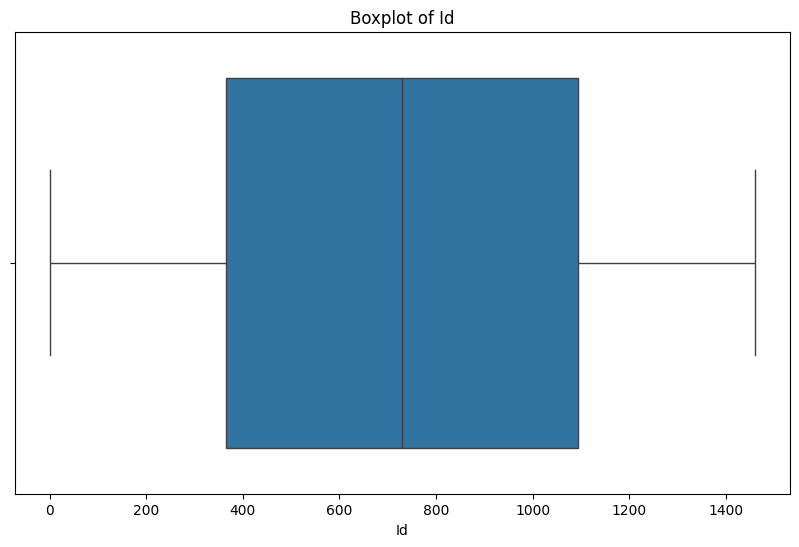

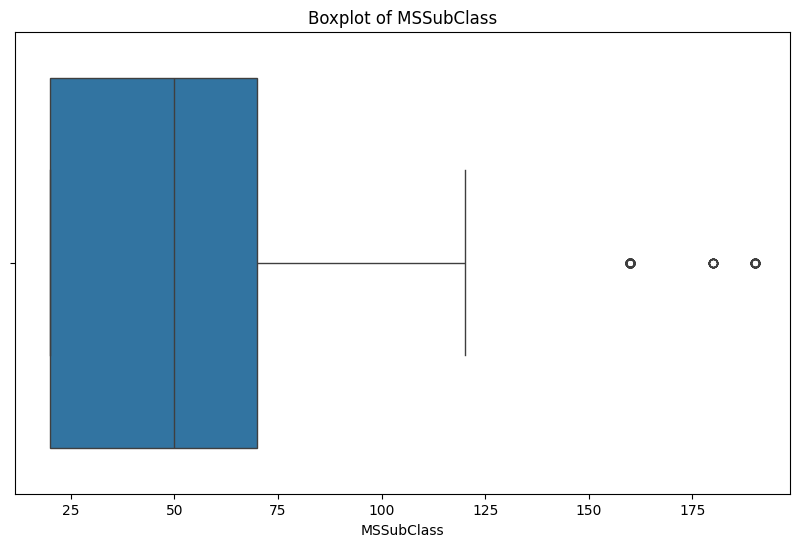

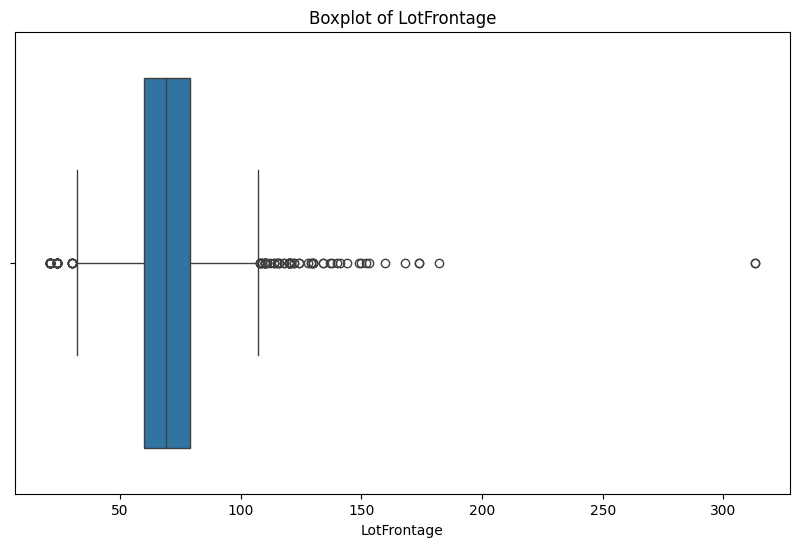

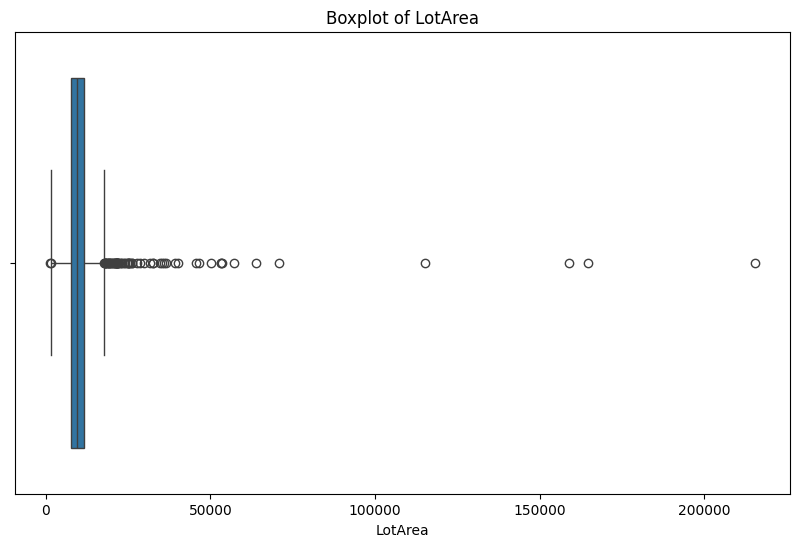

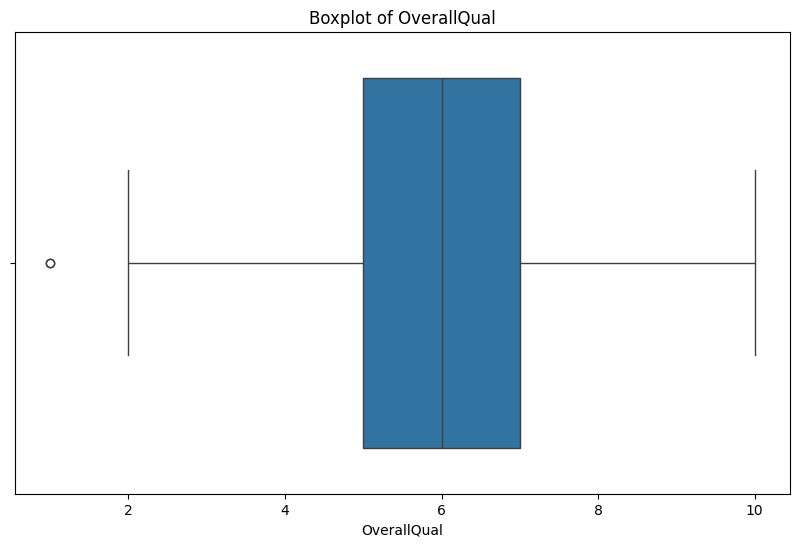

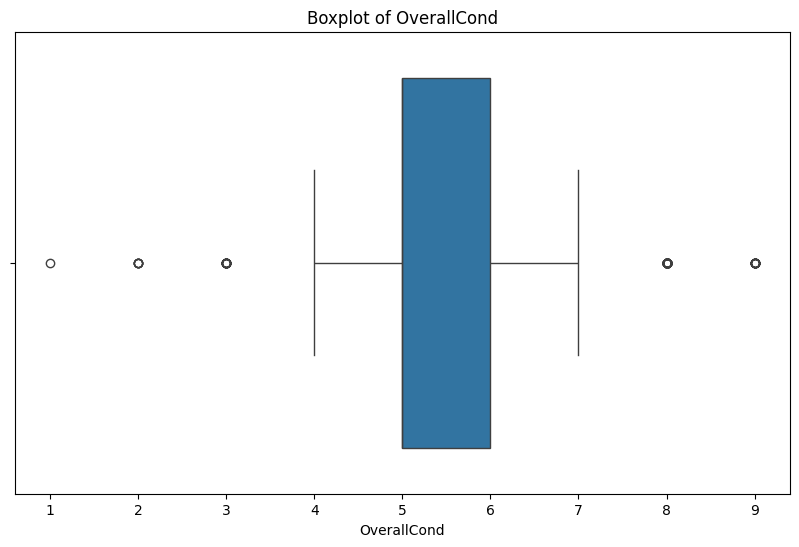

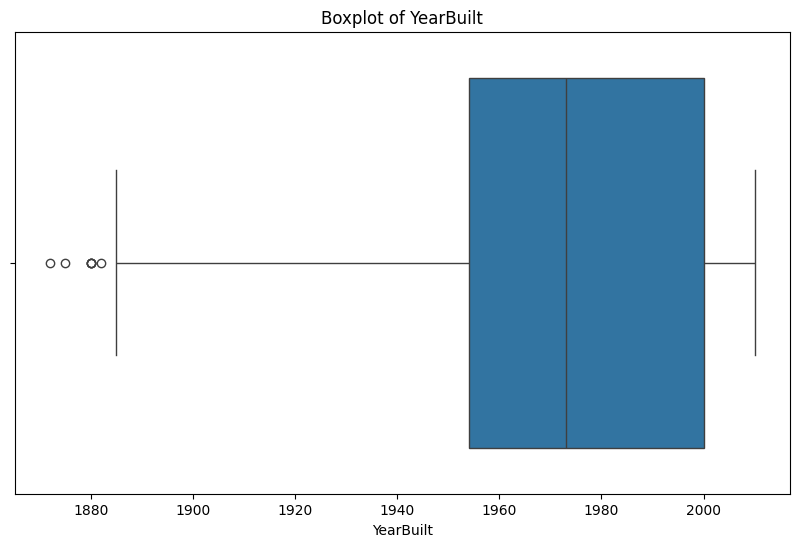

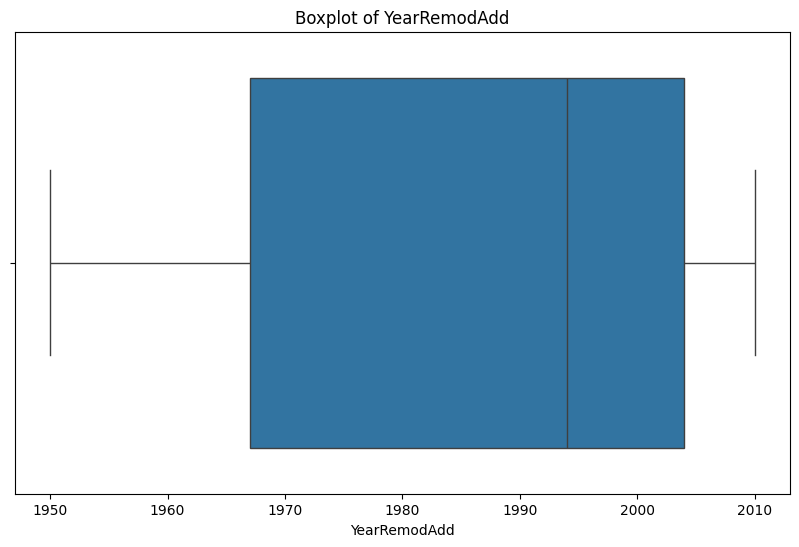

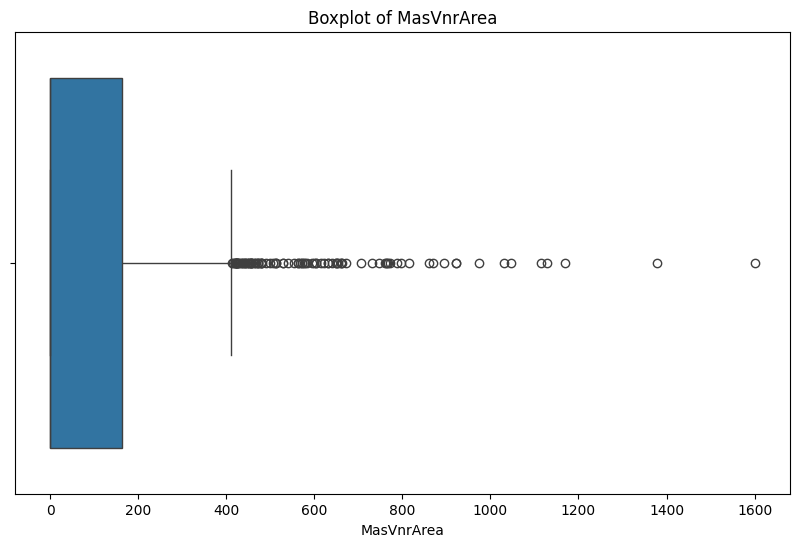

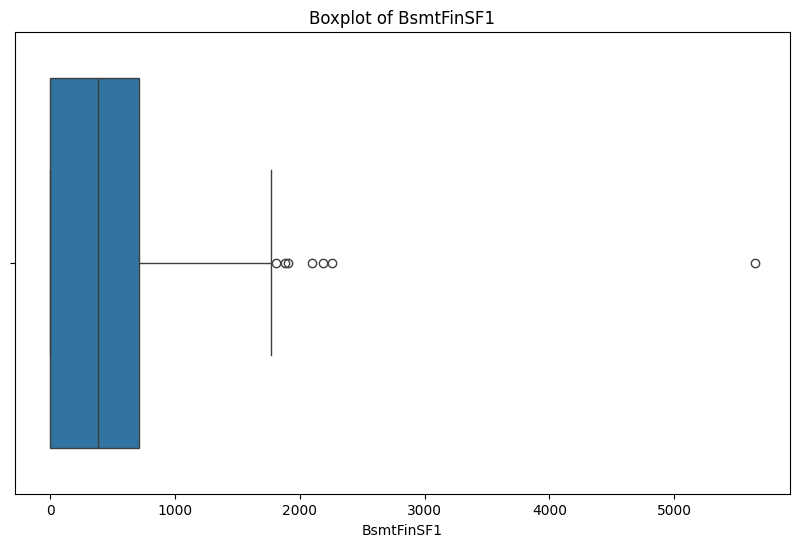

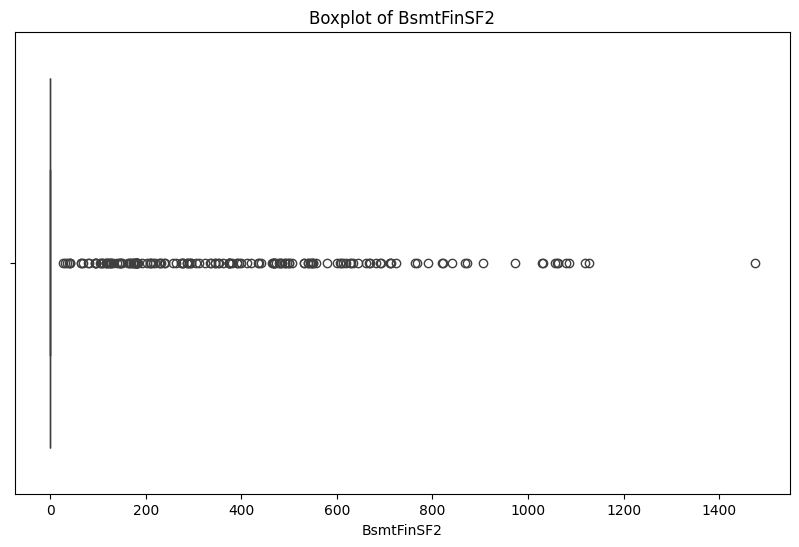

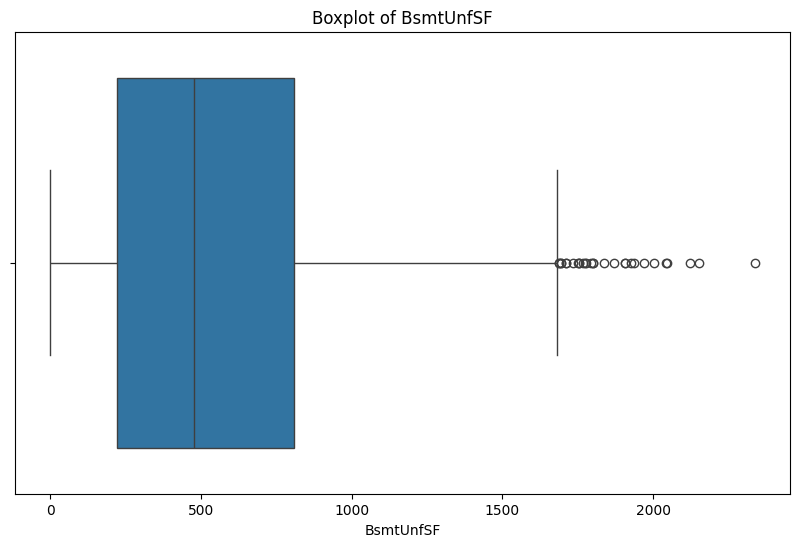

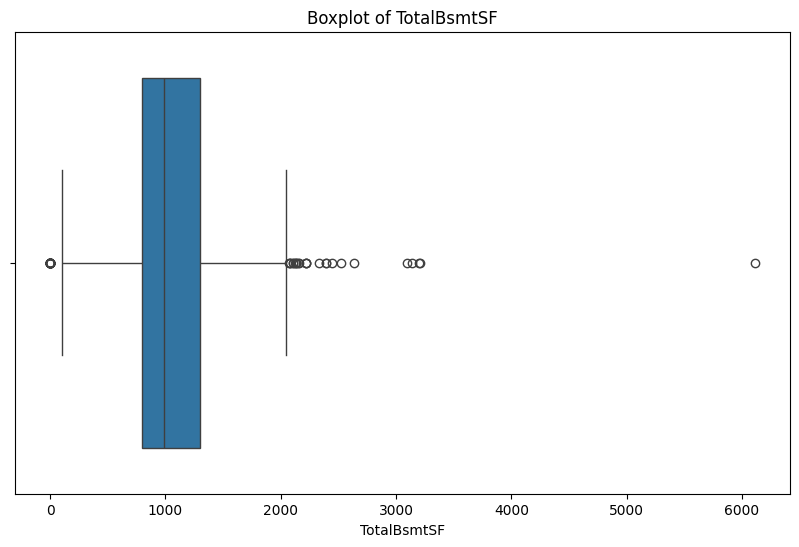

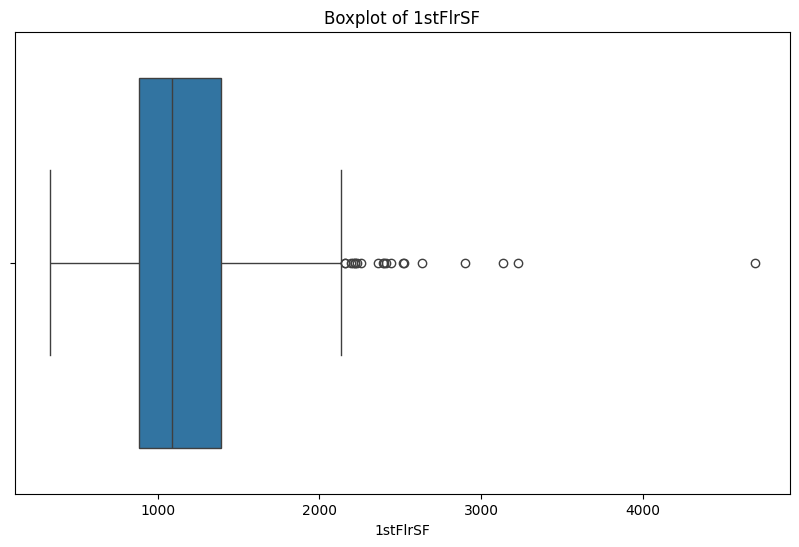

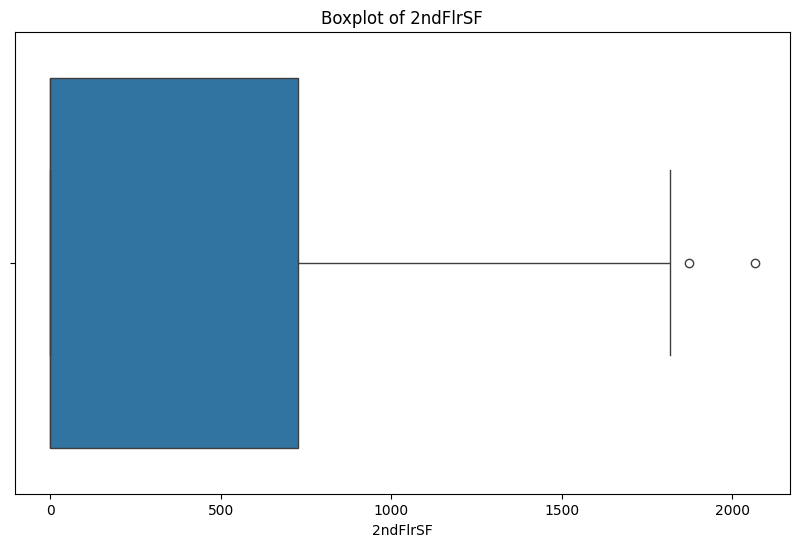

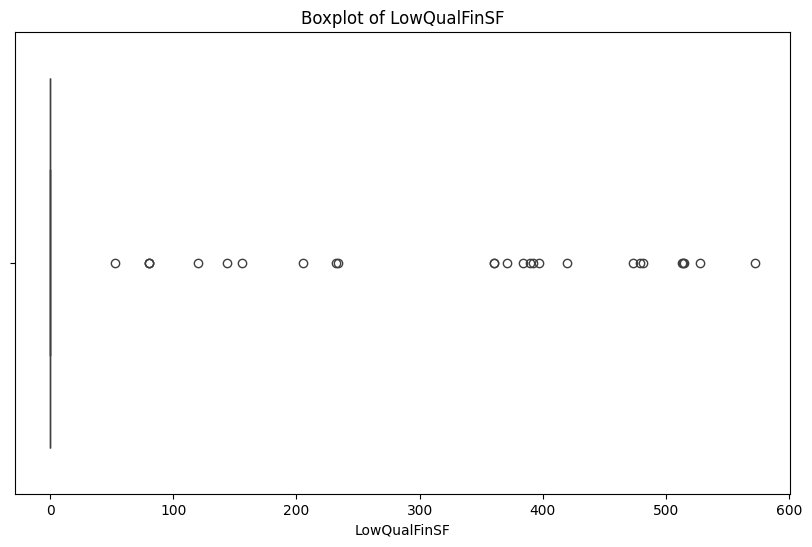

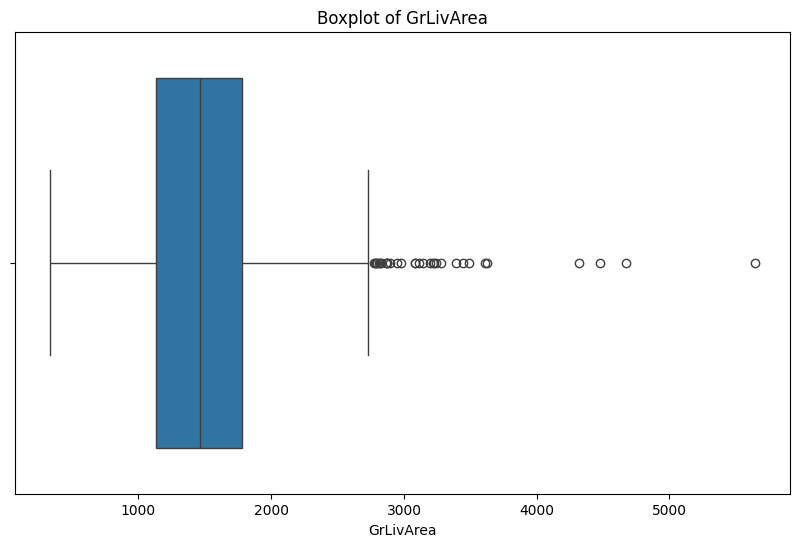

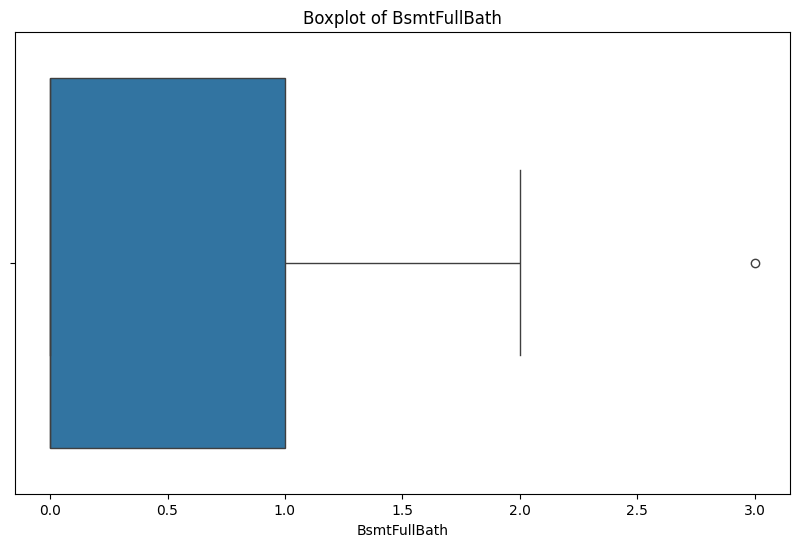

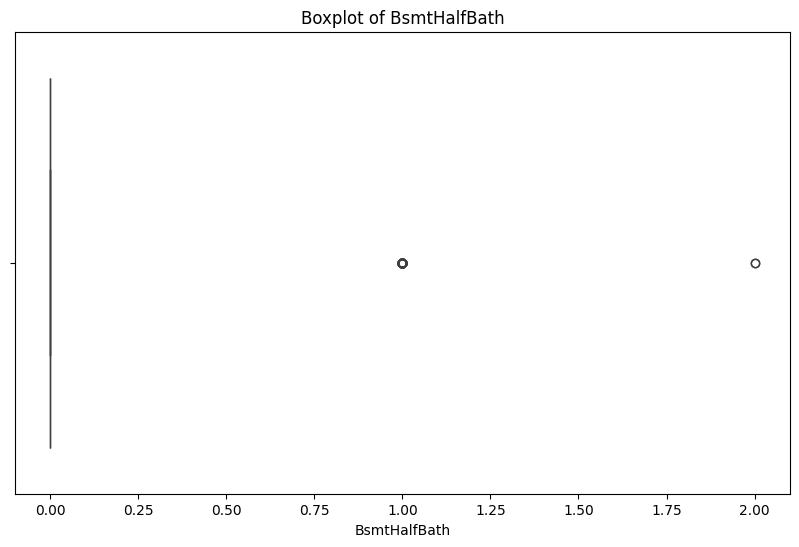

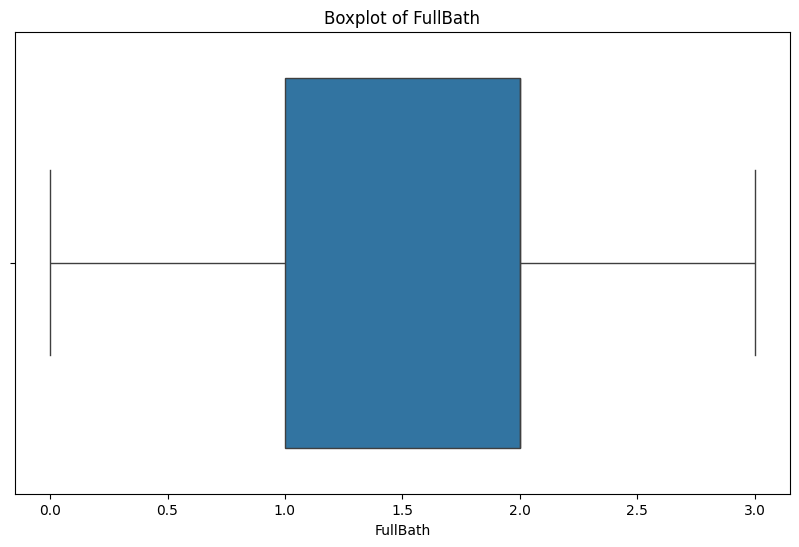

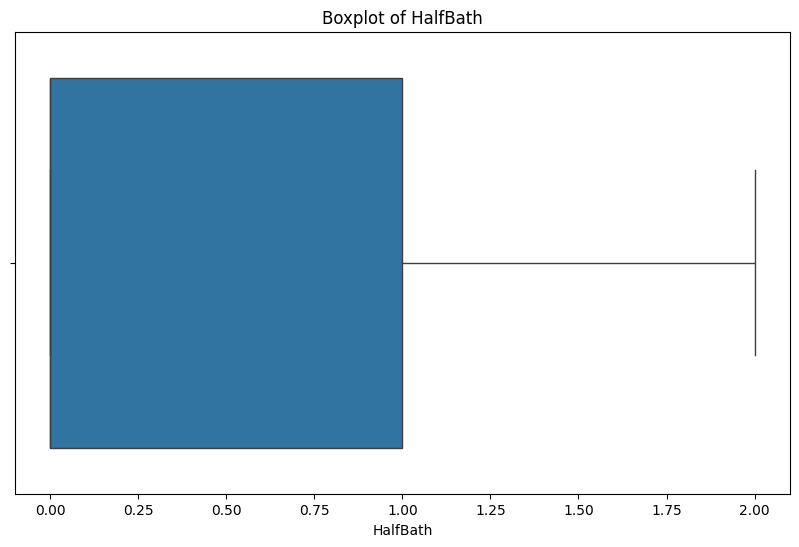

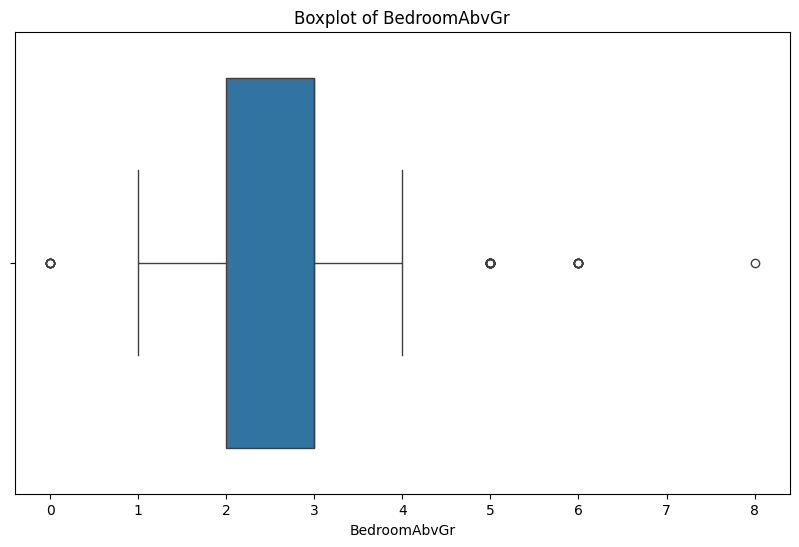

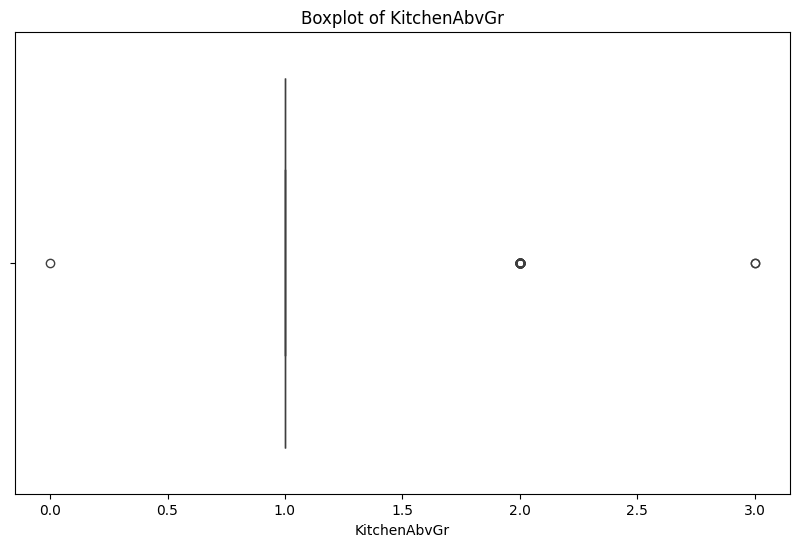

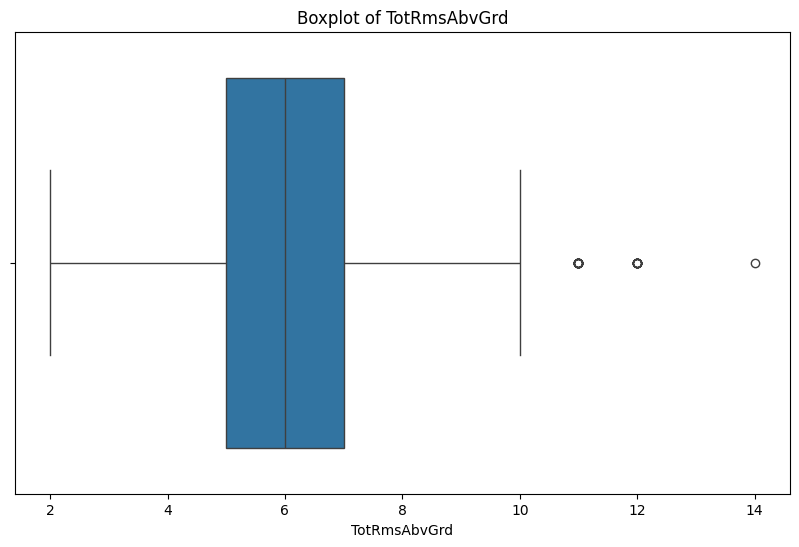

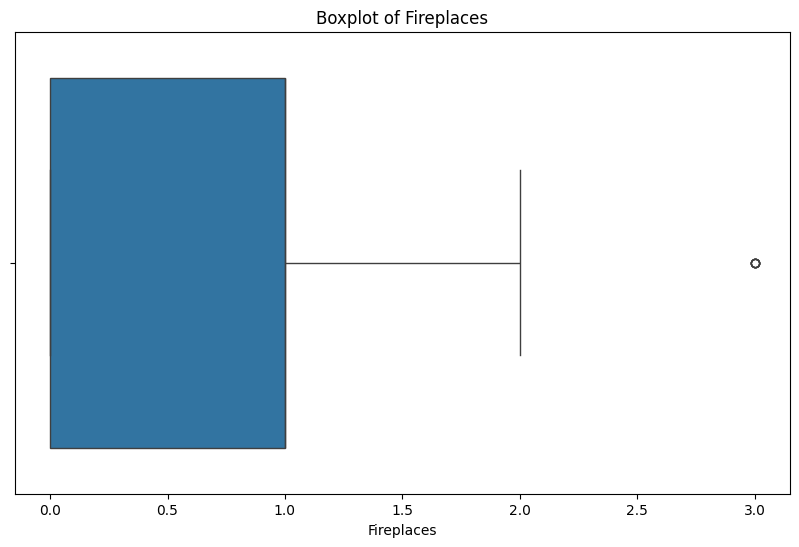

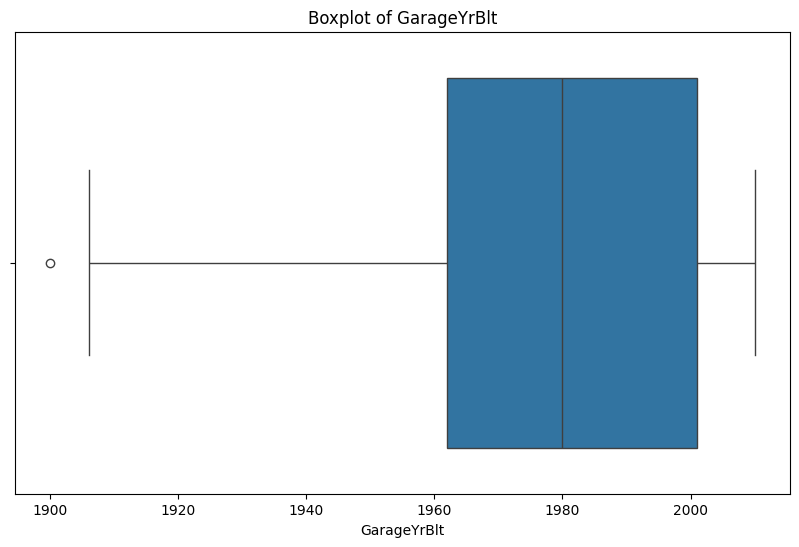

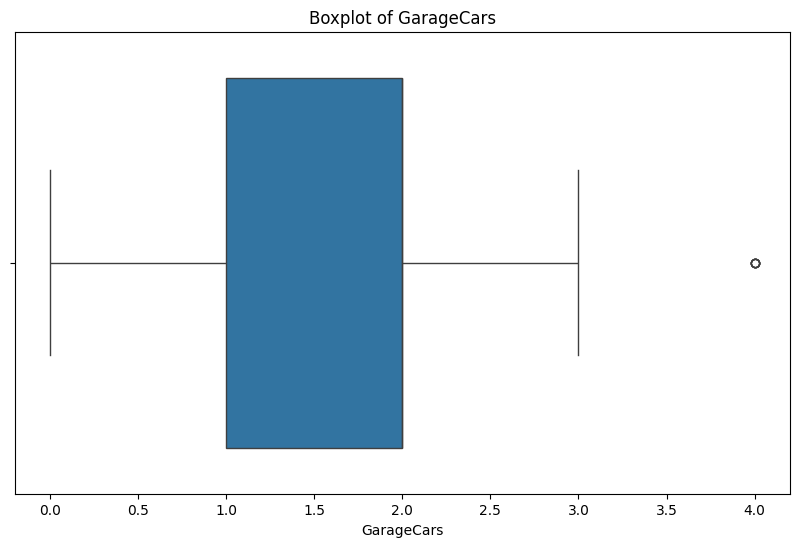

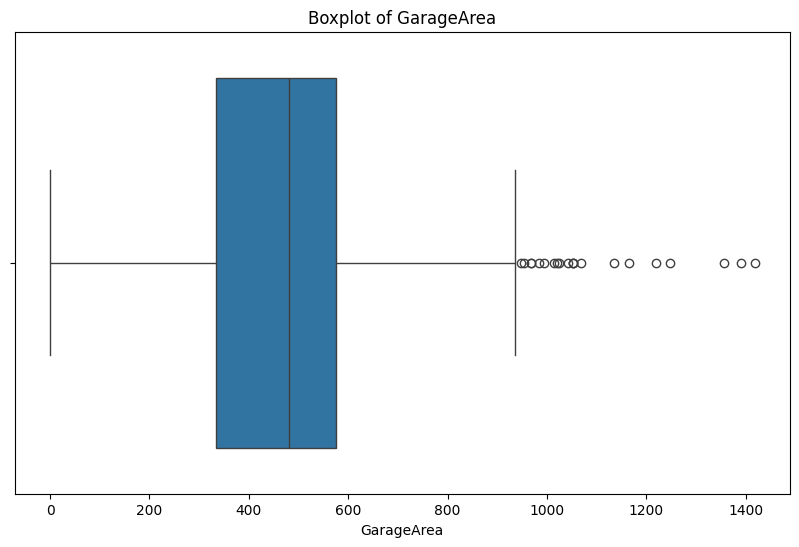

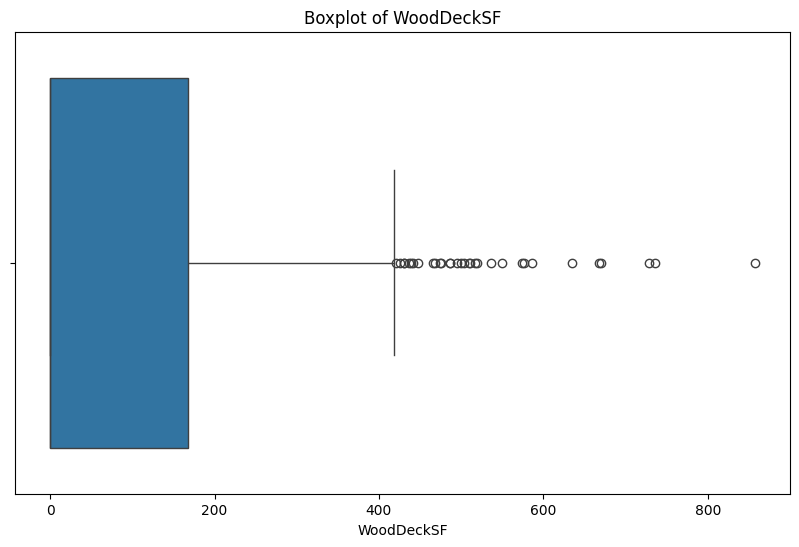

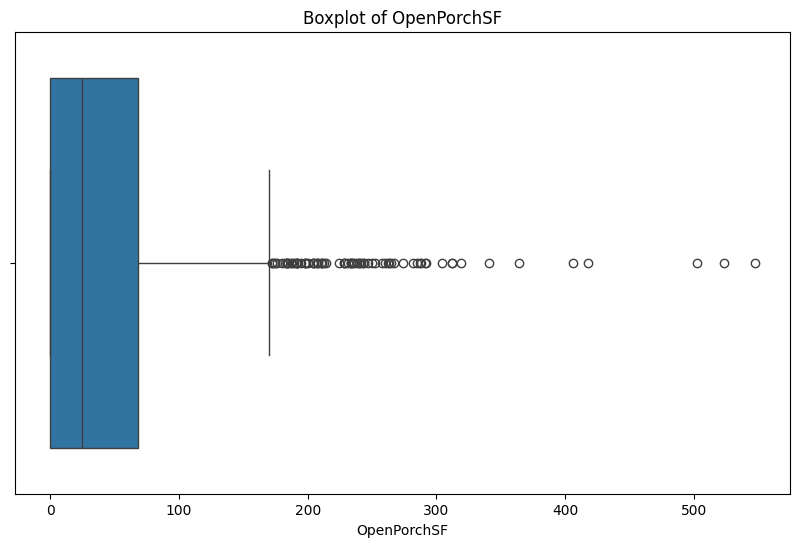

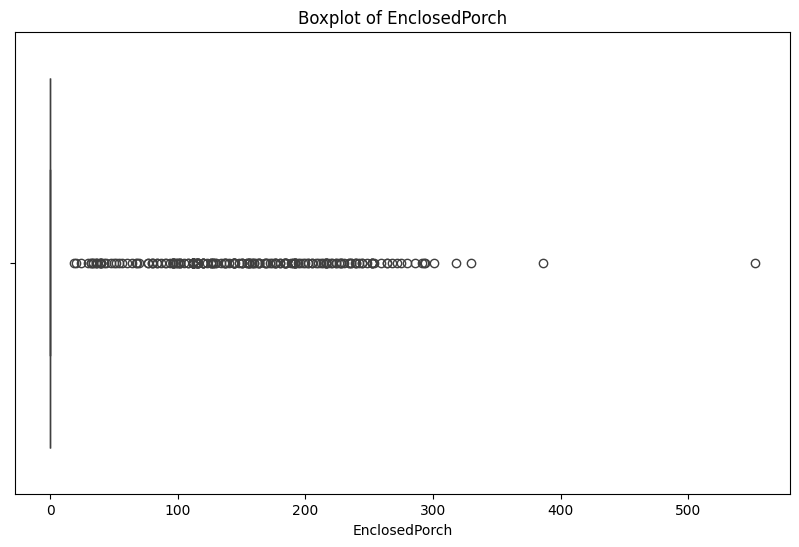

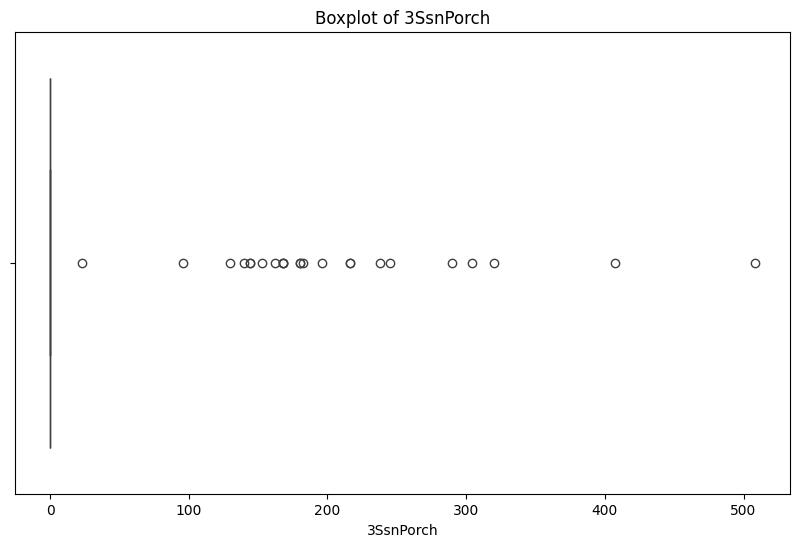

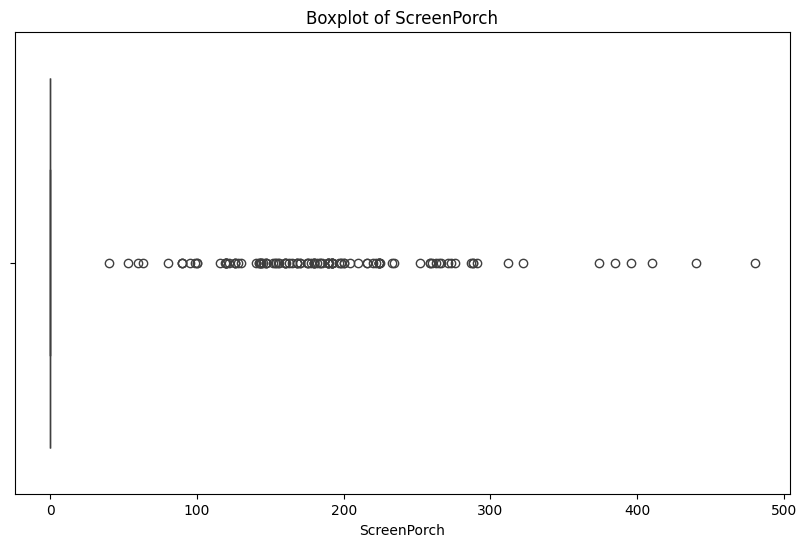

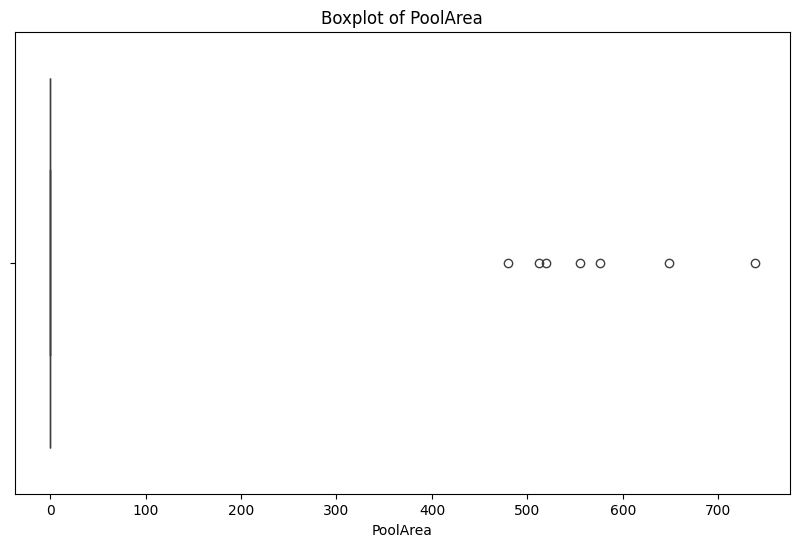

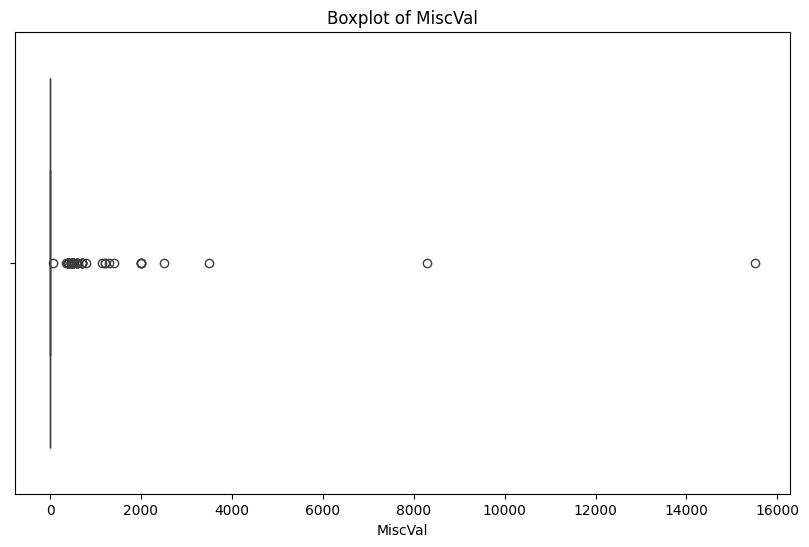

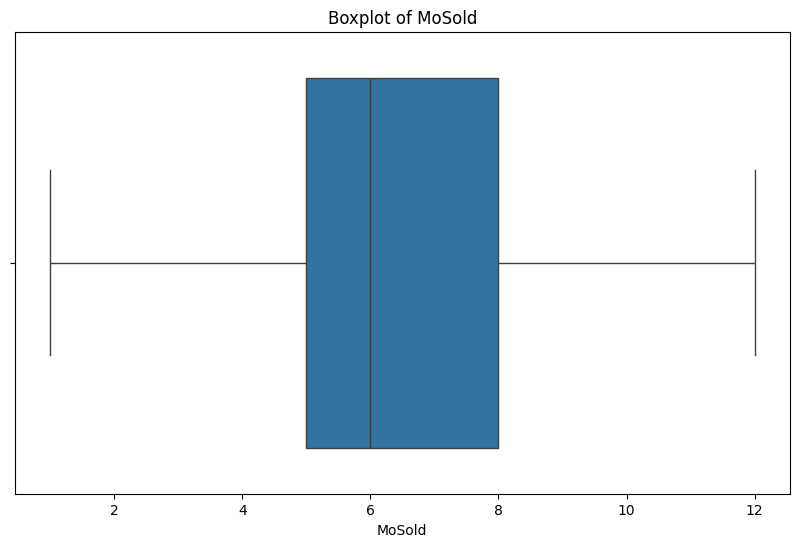

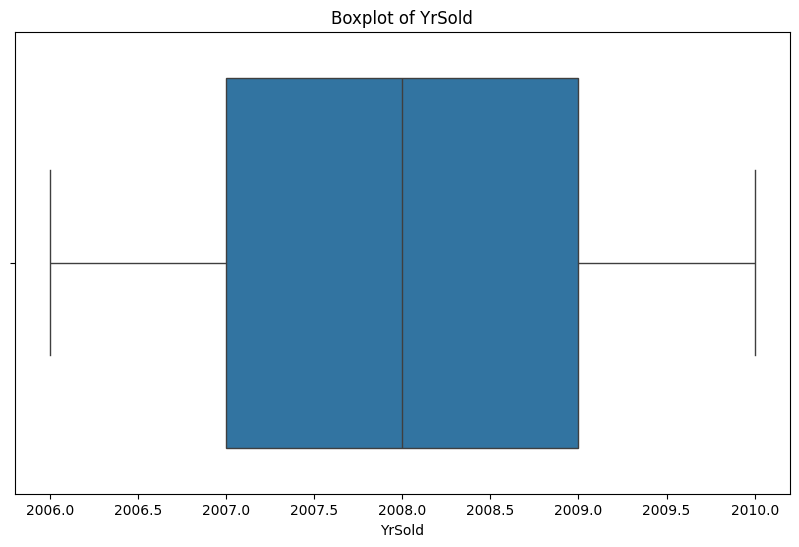

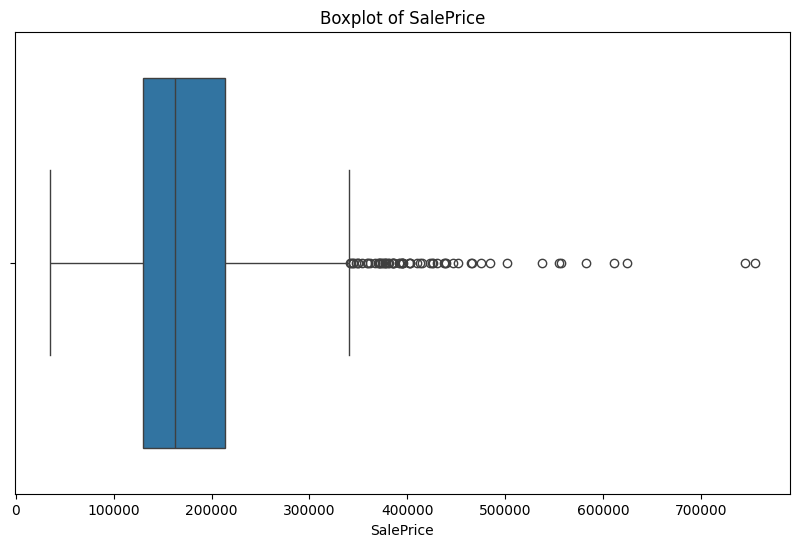

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

Identifikasi outlier menggunakan IQR

In [14]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

In [15]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

### Normalisasi dan Standardisasi Data

Standardisasi

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

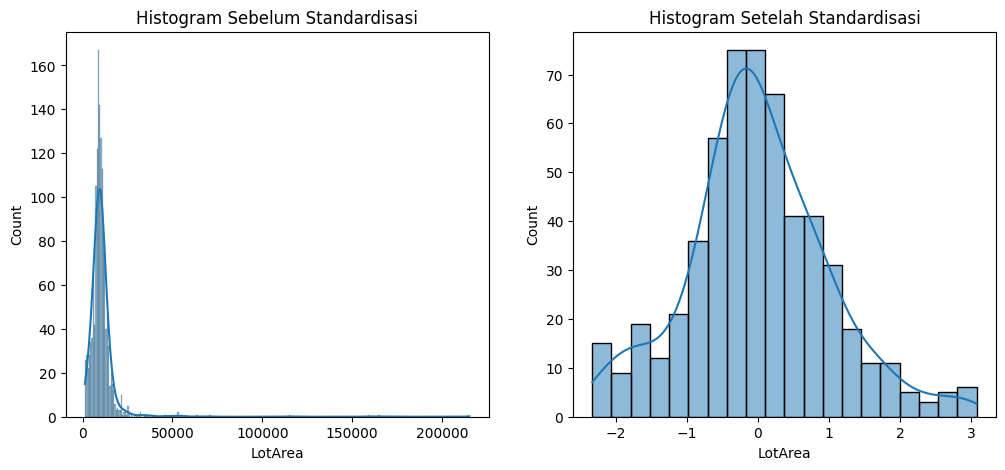

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

### Menangani Duplikasi Data

Mengidentifikasi baris duplikat

In [18]:
duplicates = df.duplicated()
print(f"Jumlah baris duplikat: {duplicates.sum()}")

Jumlah baris duplikat: 0


Menghapus data jika ada data yang duplikat

In [19]:
df = df.drop_duplicates()

print("DataFrame setelah menghapus duplikat:")
print(df)

DataFrame setelah menghapus duplikat:
            Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0    -1.768952    0.356986    -0.265012 -0.284244     0.614520    -0.523677   
2    -1.764179    0.356986    -0.037099  0.744924     0.614520    -0.523677   
4    -1.759405    0.356986     1.178437  1.851281     1.419903    -0.523677   
6    -1.754632   -0.917637     0.494698  0.316349     1.419903    -0.523677   
10   -1.745085   -0.917637     0.114843  0.726546    -0.996245    -0.523677   
...        ...         ...          ...       ...          ...          ...   
1448  1.687057    0.038330     0.114843  0.934953    -1.801628     2.308244   
1451  1.694217   -0.917637     0.722611  0.014215     1.419903    -0.523677   
1453  1.698991   -0.917637     1.634263  2.938156    -0.996245    -0.523677   
1454  1.701378   -0.917637    -0.492925 -0.633426     0.614520    -0.523677   
1455  1.703764    0.356986    -0.492925 -0.480154    -0.190863    -0.523677   

      YearBui

### Mengonversi Tipe Data

In [20]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1448       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1451       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1453       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1454       FV   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
0         CollgCr       Norm       Norm  ...          Gd        Typ   
2         CollgCr       Norm       Norm  ...          Gd        Typ   
4         NoRidge       Norm       Norm  ...          Gd        Typ   
6         Somerst       Norm       Norm  ...          Gd        Typ   
10         Sawyer       Norm       Norm  ...          TA        Typ   
...           ...        ...        ...  ...         ...        ...   
1448      Edwards       Norm       Norm  ...          TA       Min2   
1451      Somerst       Norm       Norm  ...          Ex        Typ   
1453      Mitchel       Norm       Norm  ...          TA        Typ   
1454      Somerst       Norm       Norm  ...          Gd        Typ   
1455      Gilbert       Norm       Norm  ...          TA        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0             Gd     Attchd          RFn         TA         TA          Y   
2             TA     Attchd          RFn         TA         TA          Y   
4             TA     Attchd          RFn         TA         TA          Y   
6             Gd     Attchd          RFn         TA         TA          Y   
10            Gd     Detchd          Unf         TA         TA          Y   
...          ...        ...          ...        ...        ...        ...   
1448          Gd     Detchd          Unf         Fa         TA          Y   
1451          Gd     Attchd          Fin         TA         TA          Y   
1453          Gd     Attchd          Unf         TA         TA          Y   
1454          Gd     Attchd          RFn         TA         TA          Y   
1455          TA     Attchd          RFn         TA         TA          Y   

     SaleType SaleCondition  
0          WD        Normal  
2          WD        Normal  
4          WD        Normal  
6          WD        Normal  
10         WD        Normal  
...       ...           ...  
1448       WD        Normal  
1451      New       Partial  
1453       WD       Abnorml  
1454       WD        Normal  
1455       WD        Normal  

[557 rows x 39 columns]

One Hot Encoding

In [21]:
df_one_hot = pd.get_dummies(df, columns=category_features)
df_one_hot

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0    -1.768952    0.356986    -0.265012 -0.284244     0.614520    -0.523677   
2    -1.764179    0.356986    -0.037099  0.744924     0.614520    -0.523677   
4    -1.759405    0.356986     1.178437  1.851281     1.419903    -0.523677   
6    -1.754632   -0.917637     0.494698  0.316349     1.419903    -0.523677   
10   -1.745085   -0.917637     0.114843  0.726546    -0.996245    -0.523677   
...        ...         ...          ...       ...          ...          ...   
1448  1.687057    0.038330     0.114843  0.934953    -1.801628     2.308244   
1451  1.694217   -0.917637     0.722611  0.014215     1.419903    -0.523677   
1453  1.698991   -0.917637     1.634263  2.938156    -0.996245    -0.523677   
1454  1.701378   -0.917637    -0.492925 -0.633426     0.614520    -0.523677   
1455  1.703764    0.356986    -0.492925 -0.480154    -0.190863    -0.523677   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0      0.784193      0.704506    1.183911    0.639427  ...           False   
2      0.704296      0.653431    0.856804    0.101006  ...           False   
4      0.664347      0.551281    2.665515    0.514611  ...           False   
6      0.824141      0.806656    1.087703    2.262035  ...           False   
10    -0.733845     -1.236347   -0.701766    1.128902  ...           False   
...         ...           ...         ...         ...  ...             ...   
1448  -2.931004      0.551281   -0.701766   -1.088417  ...           False   
1451   0.983934      1.010957    1.164670   -1.088417  ...           False   
1453   0.904038      0.857731   -0.701766   -1.088417  ...           False   
1454   0.824141      0.806656   -0.701766   -0.084995  ...           False   
1455   0.624399      0.551281   -0.701766   -1.088417  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0              False         False         False         True   
2              False         False         False         True   
4              False         False         False         True   
6              False         False         False         True   
10             False         False         False         True   
...              ...           ...           ...          ...   
1448           False         False         False         True   
1451           False          True         False        False   
1453           False         False         False         True   
1454           False         False         False         True   
1455           False         False         False         True   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Family  \
0                     False                  False                 False   
2                     False                  False                 False   
4                     False                  False                 False   
6                     False                  False                 False   
10                    False                  False                 False   
...                     ...                    ...                   ...   
1448                  False                  False                 False   
1451                  False                  False                 False   
1453                   True                  False                 False   
1454                  False                  False                 False   
1455                  False                  False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
0                     True                  False  
2                     True                  False  
4                     True                  False  
6                     True                  False  
10                    True                  False  
...                    ...                    ...  
1448                  True                  False  
1451            

Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

# Insialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for column in category_features:
  df_lencoder[column] = label_encoder.fit_transform(df[column])

# Menampilkan Hasil
df_lencoder

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0    -1.768952    0.356986    -0.265012 -0.284244     0.614520    -0.523677   
2    -1.764179    0.356986    -0.037099  0.744924     0.614520    -0.523677   
4    -1.759405    0.356986     1.178437  1.851281     1.419903    -0.523677   
6    -1.754632   -0.917637     0.494698  0.316349     1.419903    -0.523677   
10   -1.745085   -0.917637     0.114843  0.726546    -0.996245    -0.523677   
...        ...         ...          ...       ...          ...          ...   
1448  1.687057    0.038330     0.114843  0.934953    -1.801628     2.308244   
1451  1.694217   -0.917637     0.722611  0.014215     1.419903    -0.523677   
1453  1.698991   -0.917637     1.634263  2.938156    -0.996245    -0.523677   
1454  1.701378   -0.917637    -0.492925 -0.633426     0.614520    -0.523677   
1455  1.703764    0.356986    -0.492925 -0.480154    -0.190863    -0.523677   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  KitchenQual  \
0      0.784193      0.704506    1.183911    0.639427  ...            2   
2      0.704296      0.653431    0.856804    0.101006  ...            2   
4      0.664347      0.551281    2.665515    0.514611  ...            2   
6      0.824141      0.806656    1.087703    2.262035  ...            2   
10    -0.733845     -1.236347   -0.701766    1.128902  ...            3   
...         ...           ...         ...         ...  ...          ...   
1448  -2.931004      0.551281   -0.701766   -1.088417  ...            3   
1451   0.983934      1.010957    1.164670   -1.088417  ...            0   
1453   0.904038      0.857731   -0.701766   -1.088417  ...            3   
1454   0.824141      0.806656   -0.701766   -0.084995  ...            2   
1455   0.624399      0.551281   -0.701766   -1.088417  ...            3   

      Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  \
0              4            2           0             1           2   
2              4            4           0             1           2   
4              4            4           0             1           2   
6              4            2           0             1           2   
10             4            2           3             2           2   
...          ...          ...         ...           ...         ...   
1448           3            2           3             2           0   
1451           4            2           0             0           2   
1453           4            2           0             2           2   
1454           4            2           0             1           2   
1455           4            4           0             1           2   

      GarageCond  PavedDrive  SaleType  SaleCondition  
0              3           2         8              3  
2              3           2         8              3  
4              3           2         8              3  
6              3           2         8              3  
10             3           2         8              3  
...          ...         ...       ...            ...  
1448           3           2         8              3  
1451           3           2         6              4  
1453           3           2         8              0  
1454           3           2         8              3  
1455           3           2         8              3  

[557 rows x 77 columns]

## Test.CSV

### Memeriksa data pada test.csv

Memeriksa tipe data pada test.csv

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Analisa statistika deskriptif

In [24]:
test.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage       LotArea Street  \
count   1459.000000  1459.000000     1455  1232.000000   1459.000000   1459   
unique          NaN          NaN        5          NaN           NaN      2   
top             NaN          NaN       RL          NaN           NaN   Pave   
freq            NaN          NaN     1114          NaN           NaN   1453   
mean    2190.000000    57.378341      NaN    68.580357   9819.161069    NaN   
std      421.321334    42.746880      NaN    22.376841   4955.517327    NaN   
min     1461.000000    20.000000      NaN    21.000000   1470.000000    NaN   
25%     1825.500000    20.000000      NaN    58.000000   7391.000000    NaN   
50%     2190.000000    50.000000      NaN    67.000000   9399.000000    NaN   
75%     2554.500000    70.000000      NaN    80.000000  11517.500000    NaN   
max     2919.000000   190.000000      NaN   200.000000  56600.000000    NaN   

       Alley LotShape LandContour Utilities  ...  ScreenPorch     PoolArea  \
count    107     1459        1459      1457  ...  1459.000000  1459.000000   
unique     2        4           4         1  ...          NaN          NaN   
top     Grvl      Reg         Lvl    AllPub  ...          NaN          NaN   
freq      70      934        1311      1457  ...          NaN          NaN   
mean     NaN      NaN         NaN       NaN  ...    17.064428     1.744345   
std      NaN      NaN         NaN       NaN  ...    56.609763    30.491646   
min      NaN      NaN         NaN       NaN  ...     0.000000     0.000000   
25%      NaN      NaN         NaN       NaN  ...     0.000000     0.000000   
50%      NaN      NaN         NaN       NaN  ...     0.000000     0.000000   
75%      NaN      NaN         NaN       NaN  ...     0.000000     0.000000   
max      NaN      NaN         NaN       NaN  ...   576.000000   800.000000   

       PoolQC  Fence MiscFeature       MiscVal       MoSold       YrSold  \
count       3    290          51   1459.000000  1459.000000  1459.000000   
unique      2      4           3           NaN          NaN          NaN   
top        Ex  MnPrv        Shed           NaN          NaN          NaN   
freq        2    172          46           NaN          NaN          NaN   
mean      NaN    NaN         NaN     58.167923     6.104181  2007.769705   
std       NaN    NaN         NaN    630.806978     2.722432     1.301740   
min       NaN    NaN         NaN      0.000000     1.000000  2006.000000   
25%       NaN    NaN         NaN      0.000000     4.000000  2007.000000   
50%       NaN    NaN         NaN      0.000000     6.000000  2008.000000   
75%       NaN    NaN         NaN      0.000000     8.000000  2009.000000   
max       NaN    NaN         NaN  17000.000000    12.000000  2010.000000   

        SaleType  SaleCondition  
count       1458           1459  
unique         9              6  
top           WD         Normal  
freq        1258           1204  
mean         NaN            NaN  
std          NaN            NaN  
min          NaN            NaN  
25%          NaN            NaN  
50%          NaN            NaN  
75%          NaN            NaN  
max          NaN            NaN  

[11 rows x 80 columns]

Memeriksa jumlah nilai yang hilang di setiap kolom

In [25]:
missing_values = test.isnull().sum()
missing_values[missing_values > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

### Data Cleaning

Memisahkan kolom yang memiliki missing value dibawah 60% dan diatas 60%

In [26]:
less_missing = missing_values[missing_values < 0.60*len(test)].index
more_missing = missing_values[missing_values >= 0.60*len(test)].index

Mengisi nilai yang hilang dengan median untuk kolom numerik (pada missing value kurang dari 60%)

In [27]:
numeric_features = test[less_missing].select_dtypes(include=['number']).columns
test[numeric_features] = test[numeric_features].fillna(test[numeric_features].median())

Mengisi nilai yang hilang dengan median untuk kolom kategorikal (pada missing value kurang dari 60%)

In [28]:
kategorical_features = test[less_missing].select_dtypes(include=['object']).columns

for col in kategorical_features:
  test[col] = test[col].fillna(test[col].mode()[0])

Menghapus kolom dengan terlalu banyak nilai yang hilang (pada kolom yang missing valuenya lebih dari 60%)

In [29]:
df = test.drop(columns=more_missing)

In [30]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

### Mengatasi Outlier

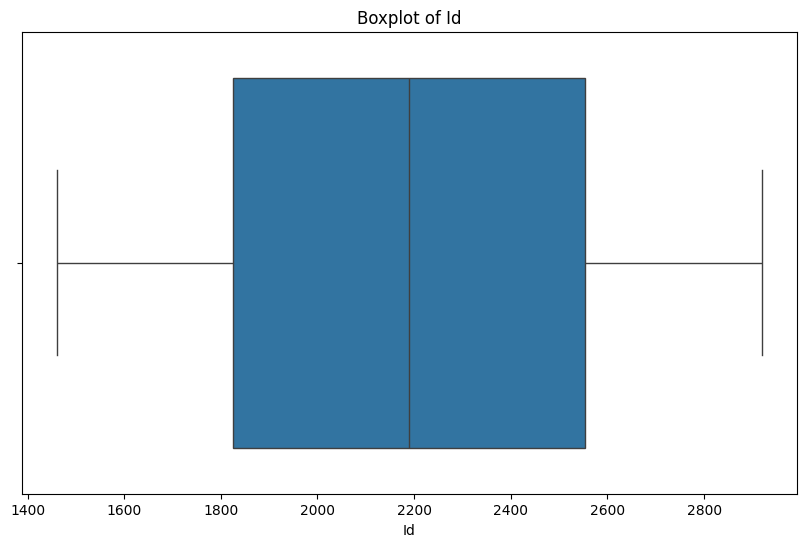

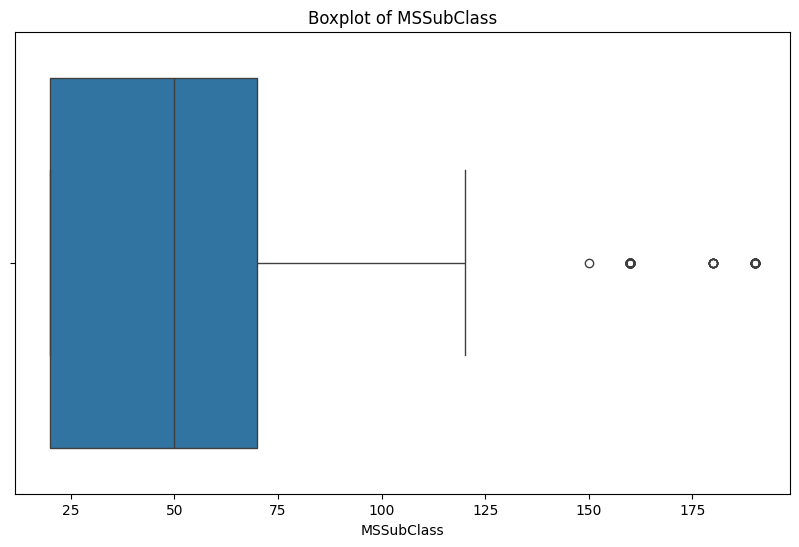

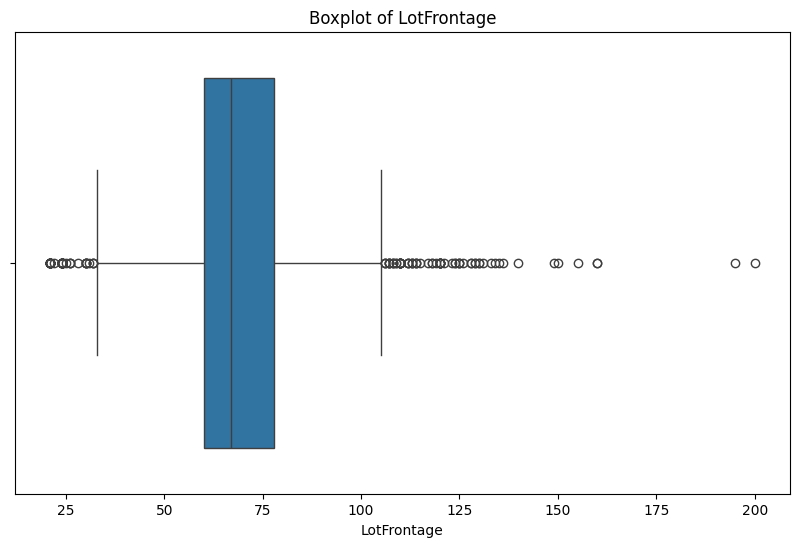

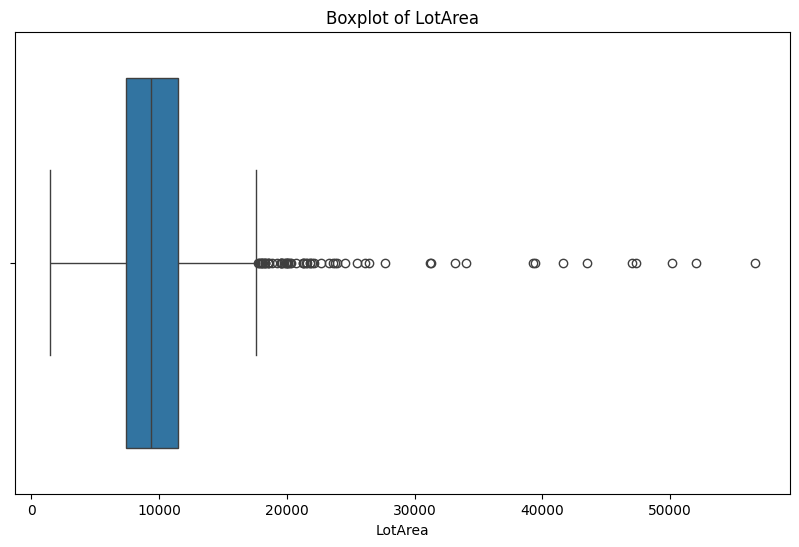

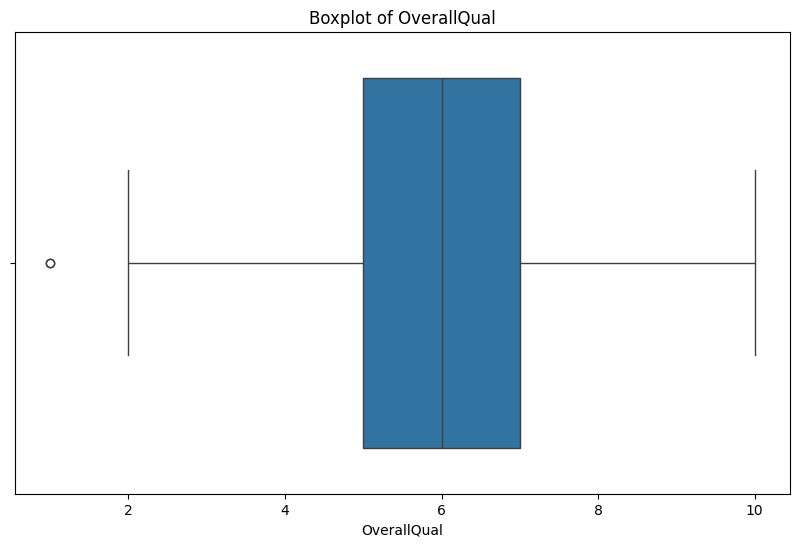

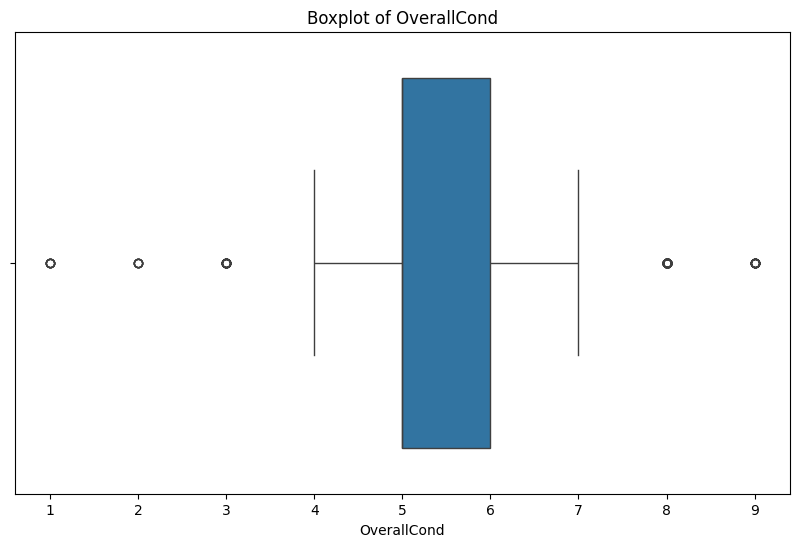

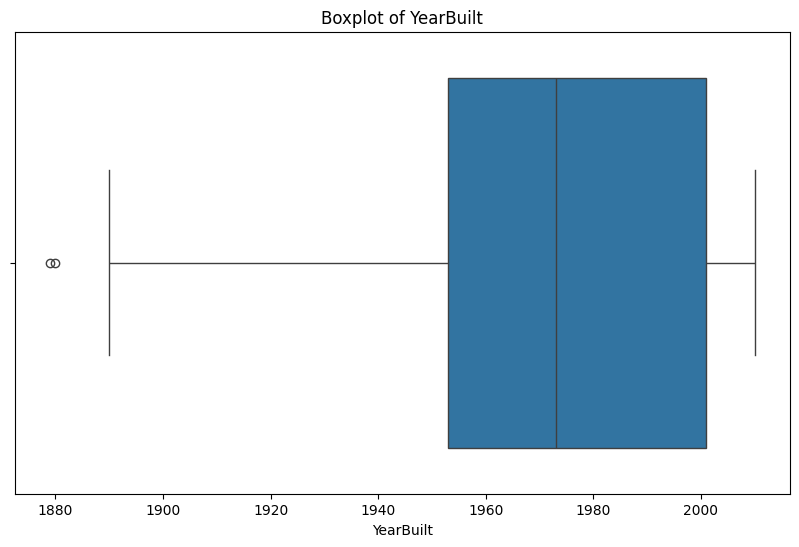

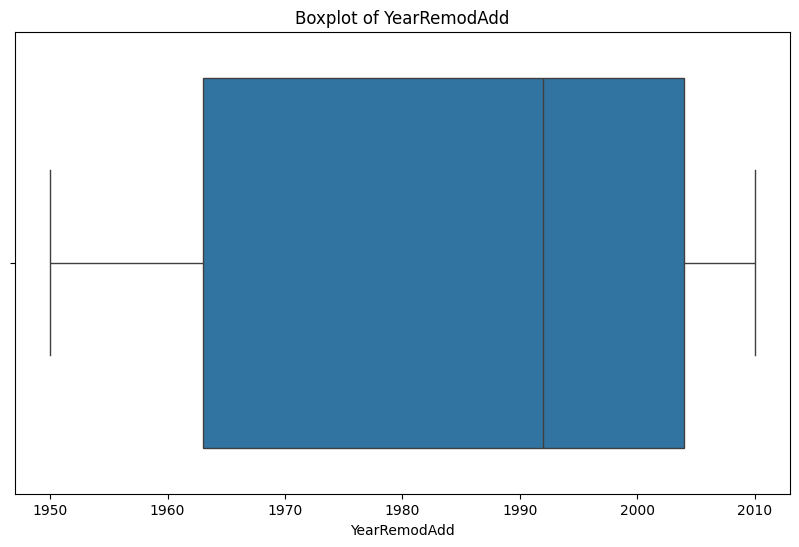

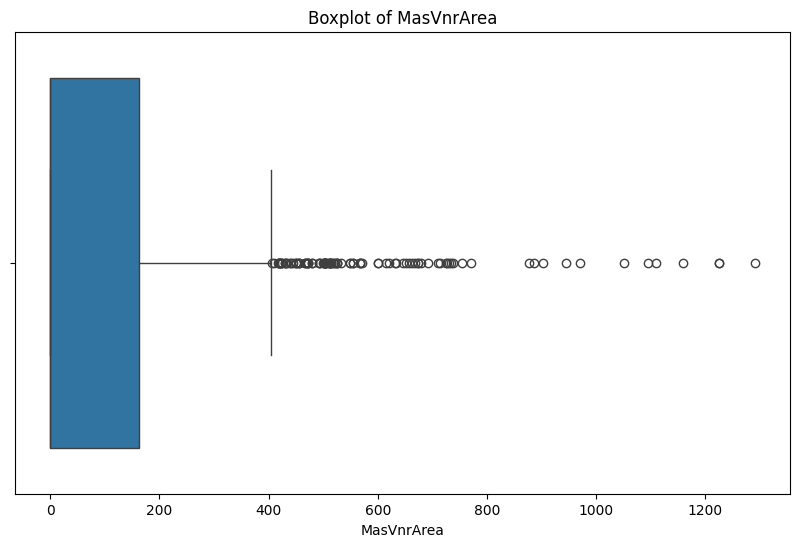

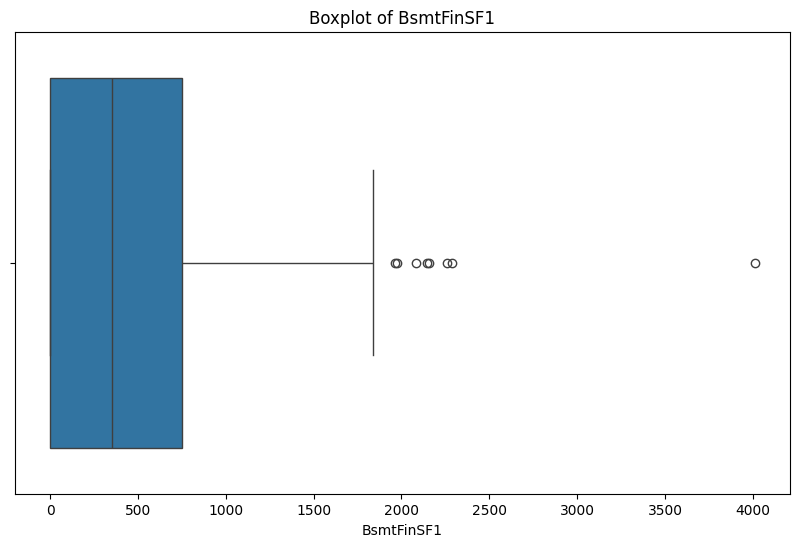

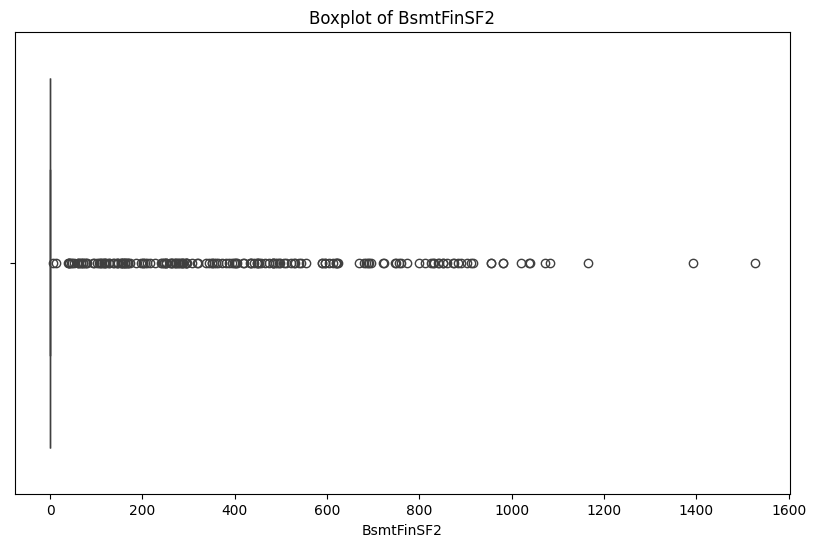

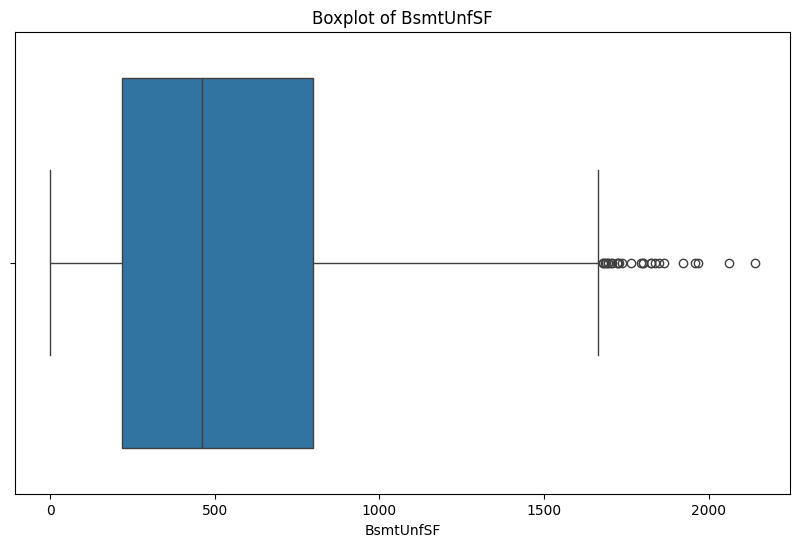

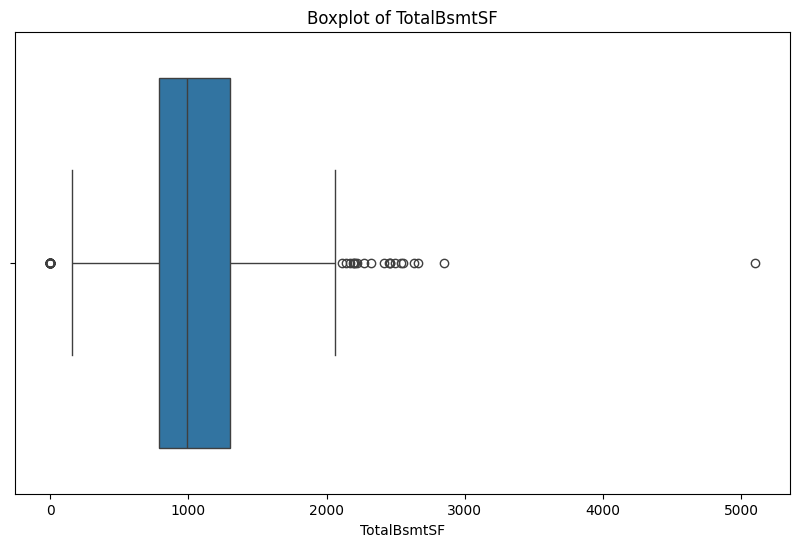

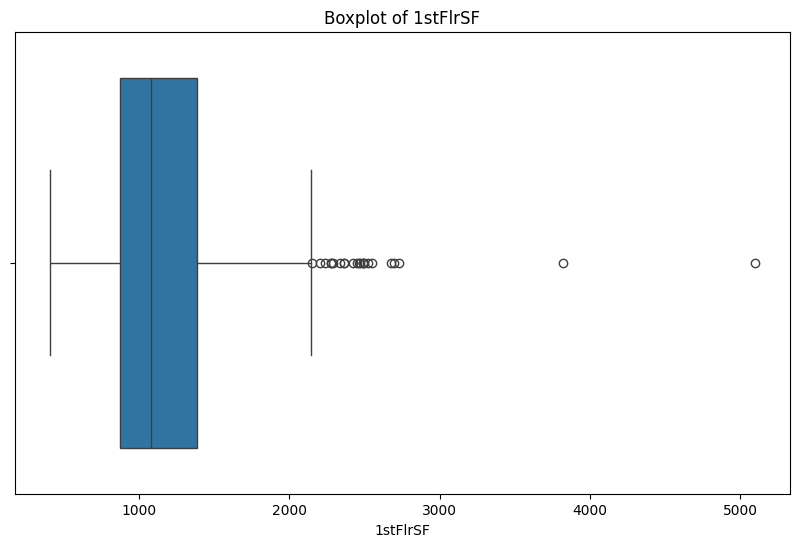

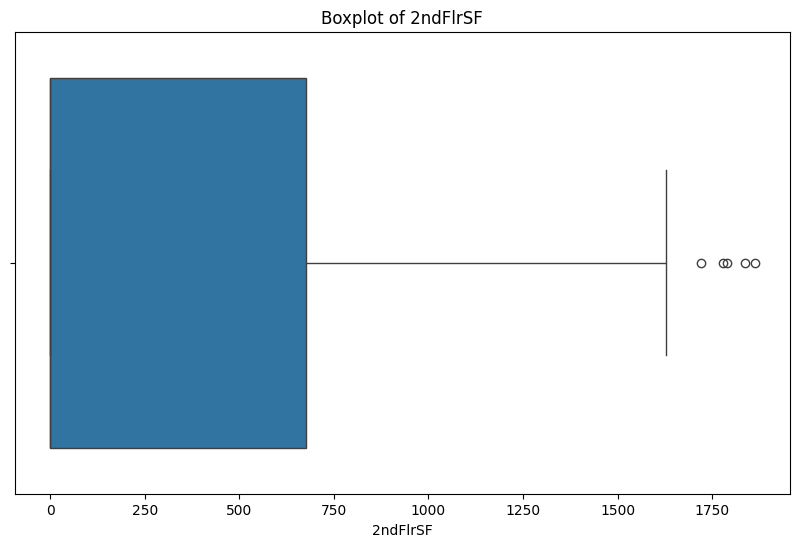

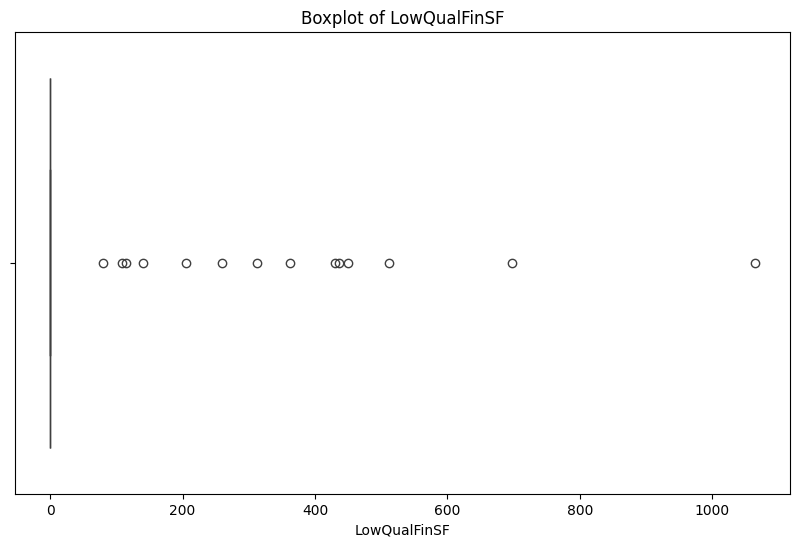

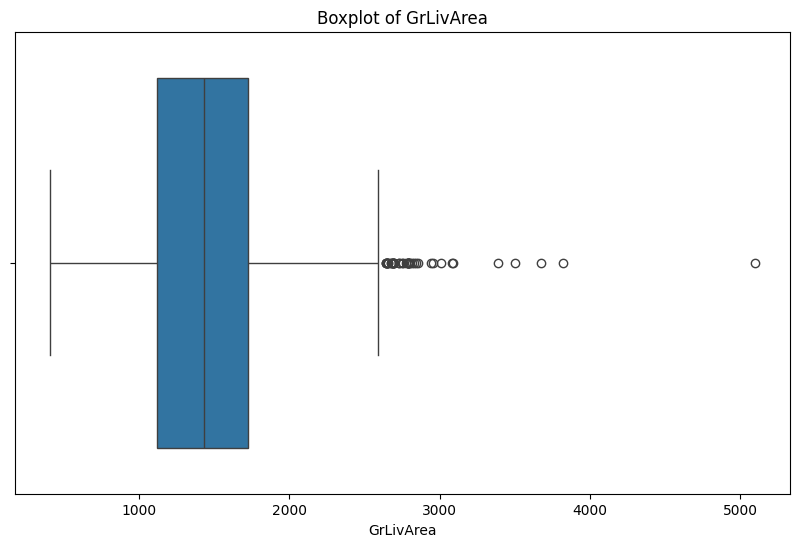

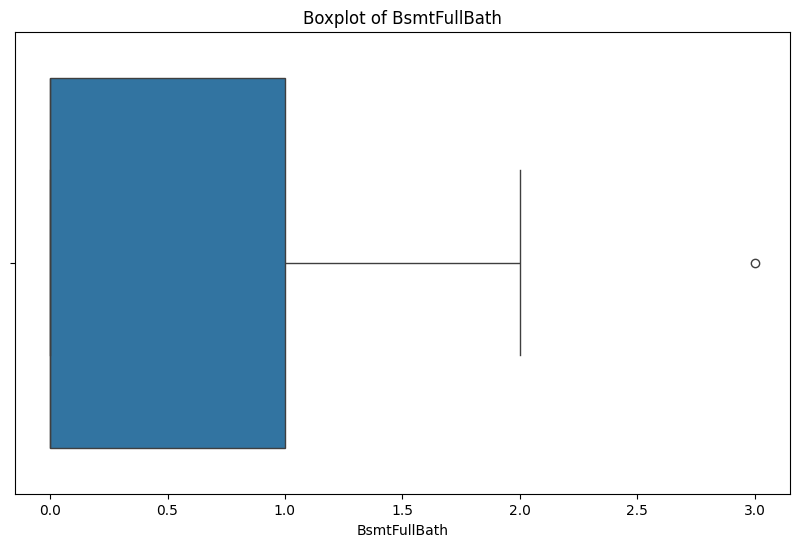

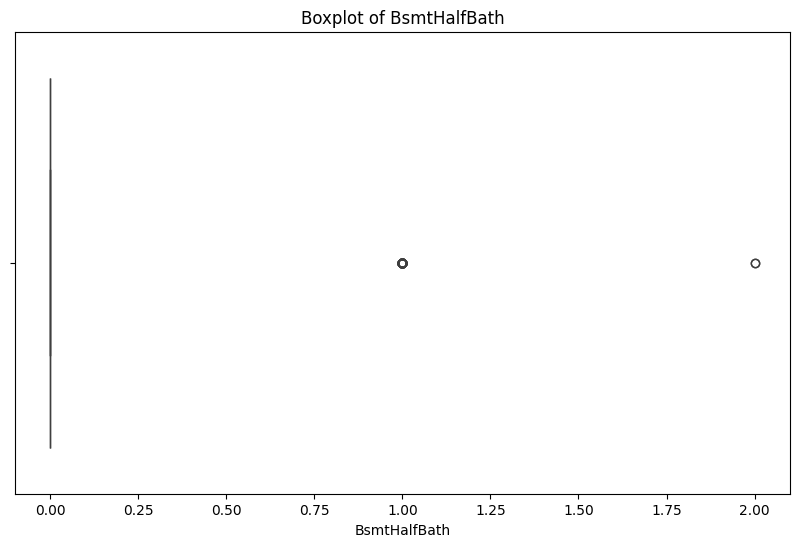

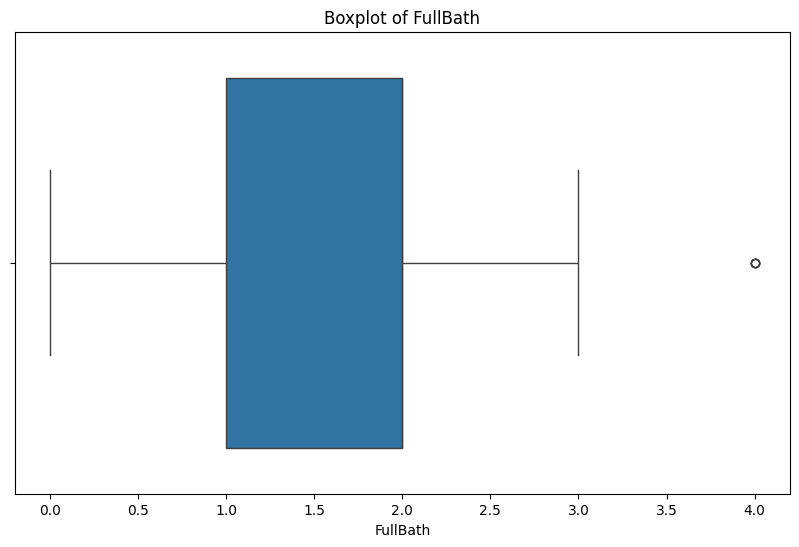

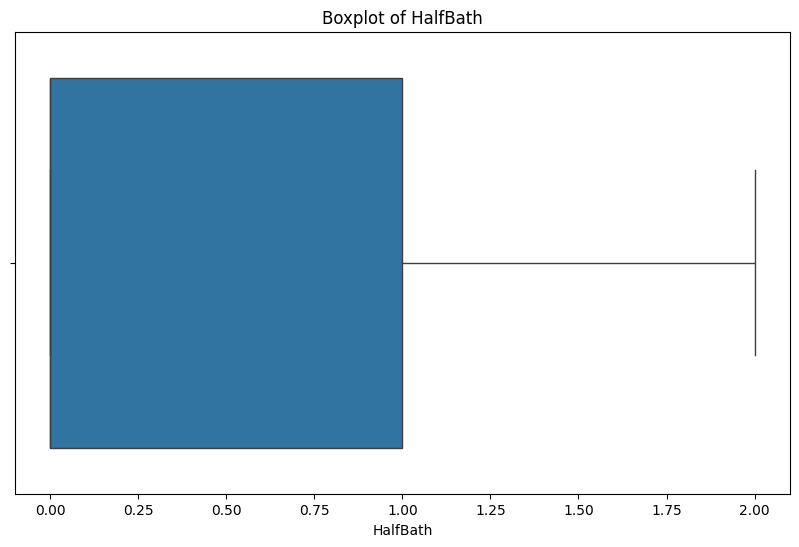

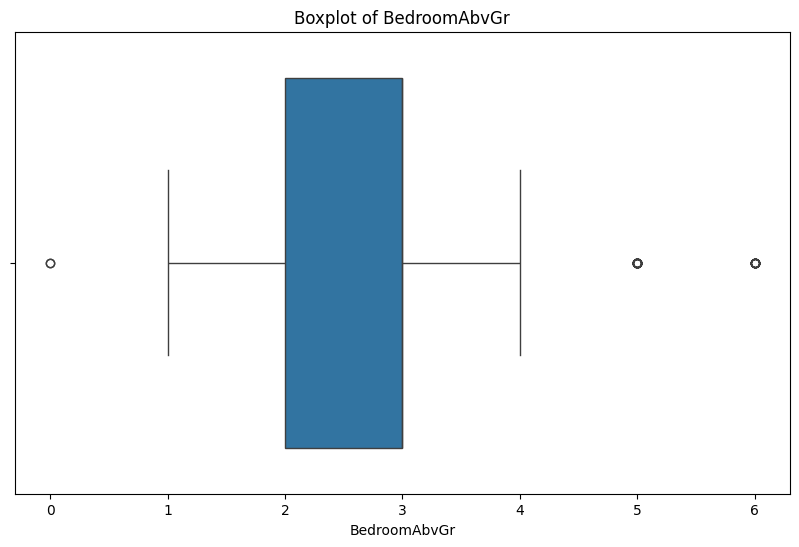

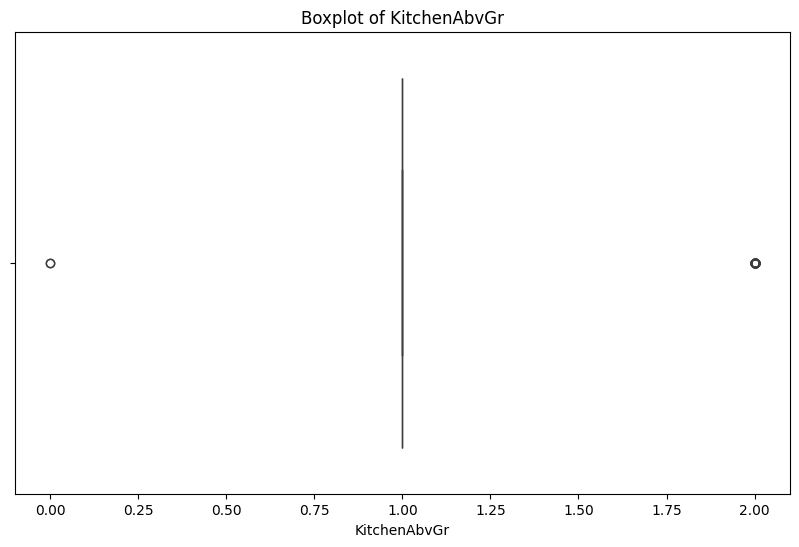

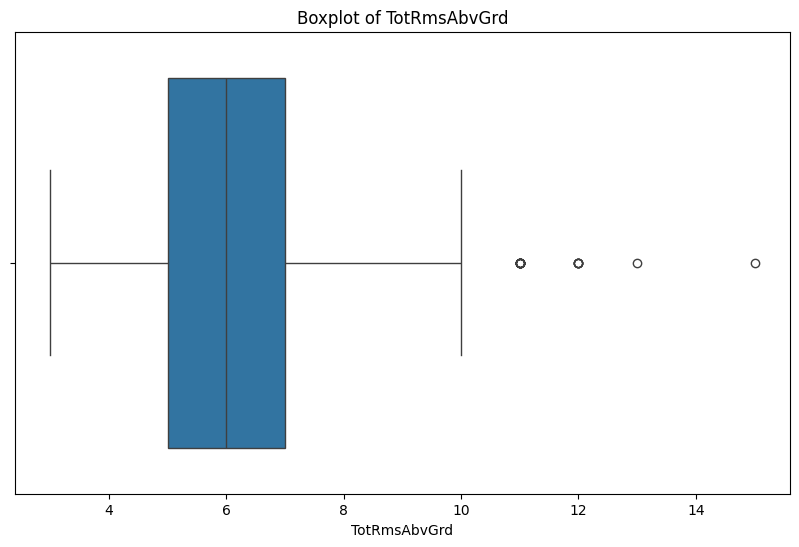

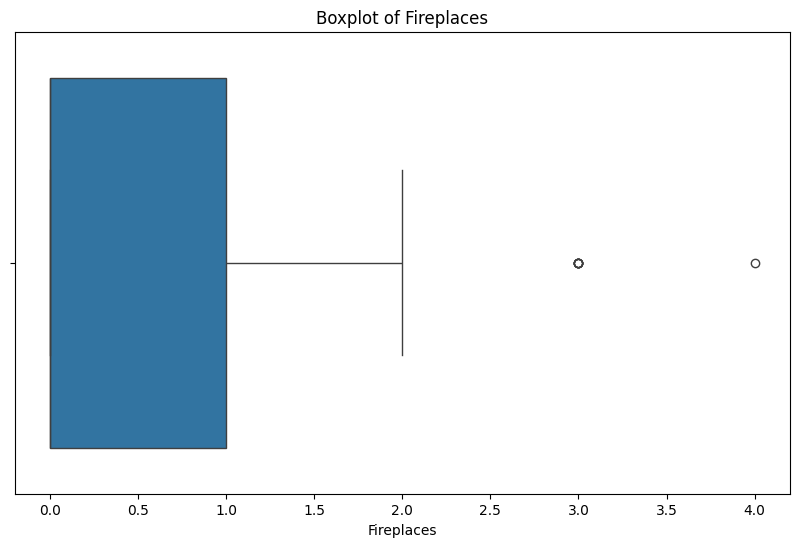

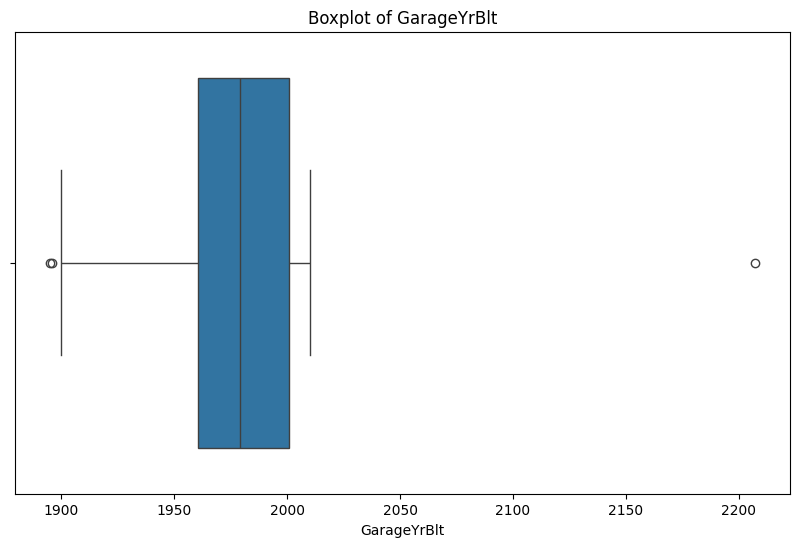

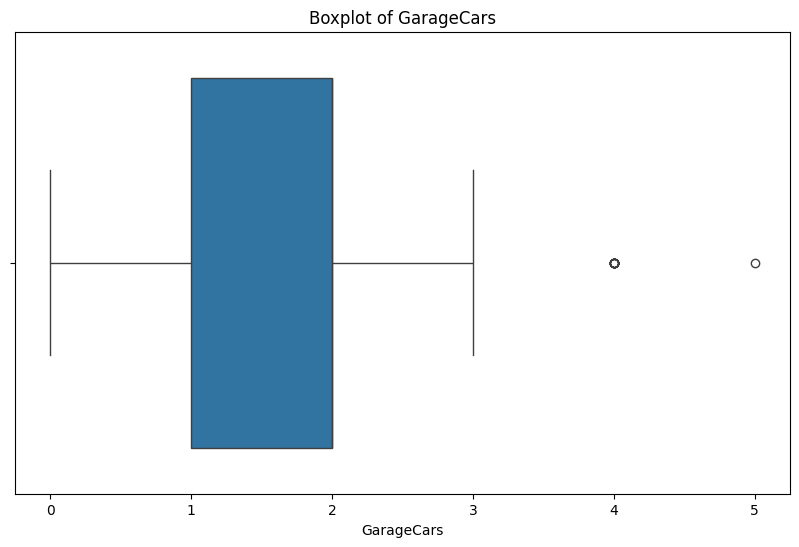

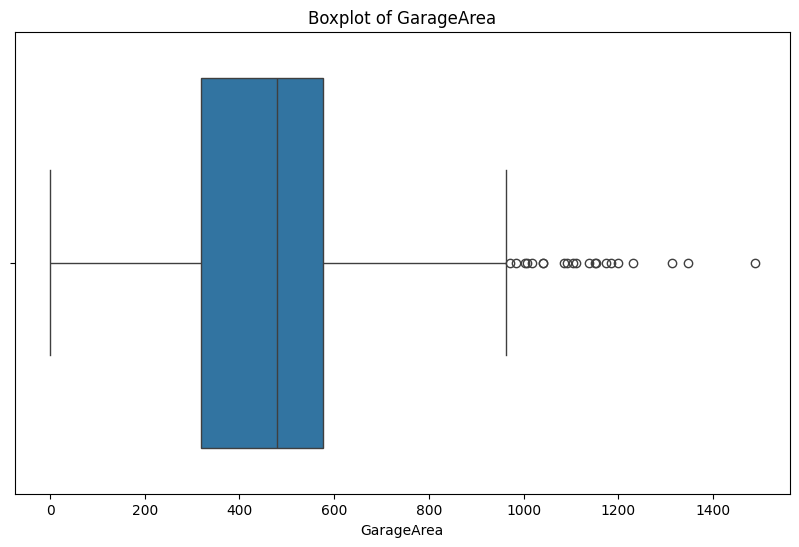

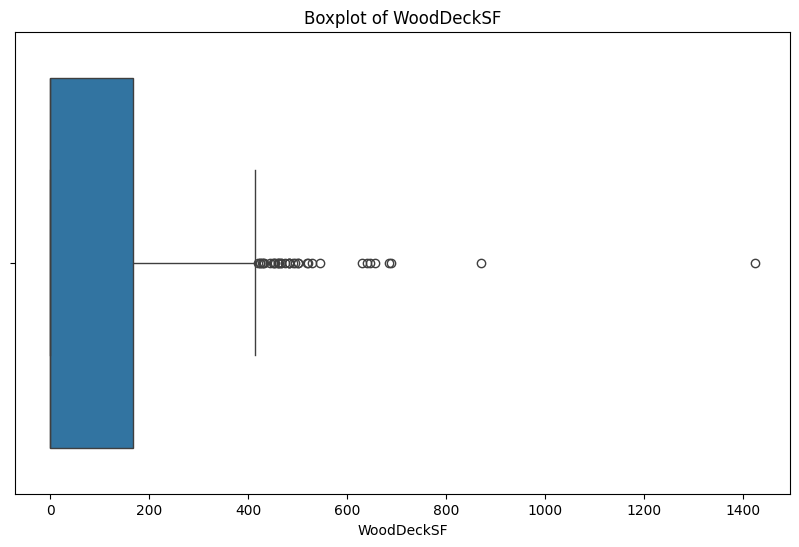

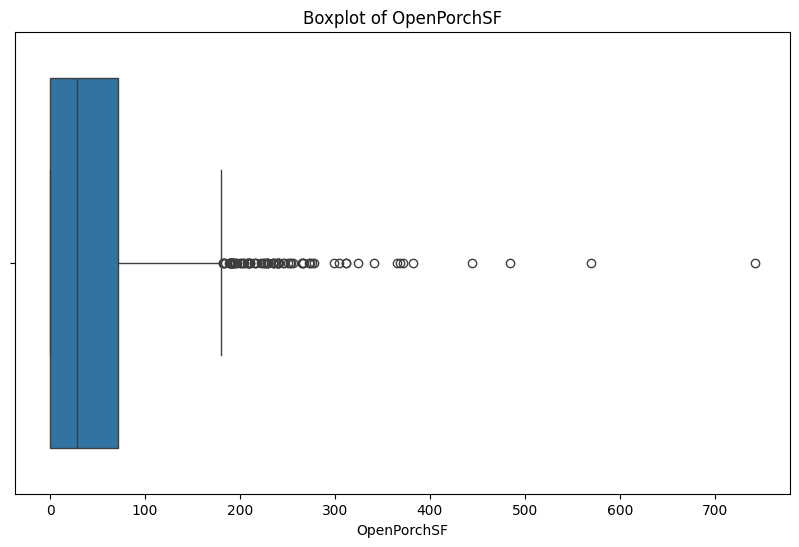

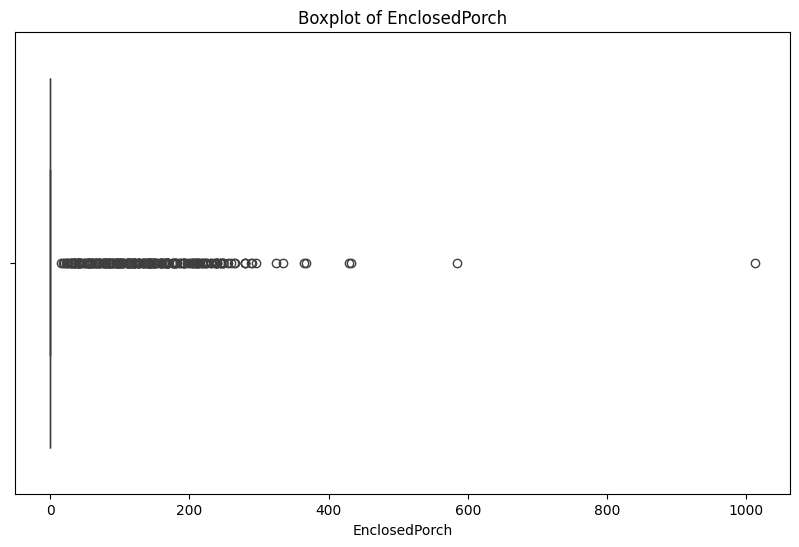

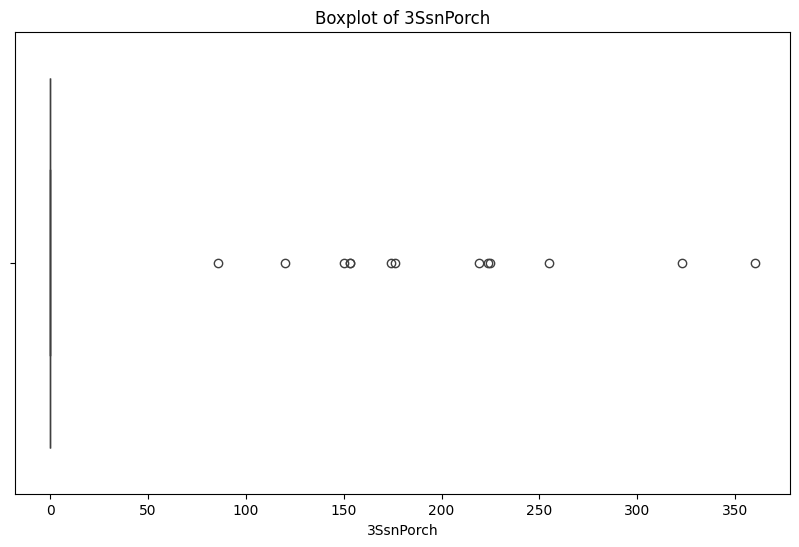

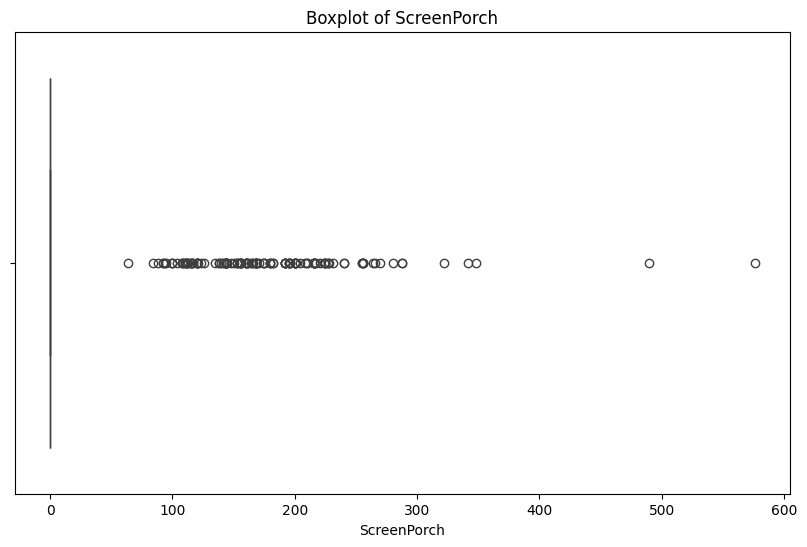

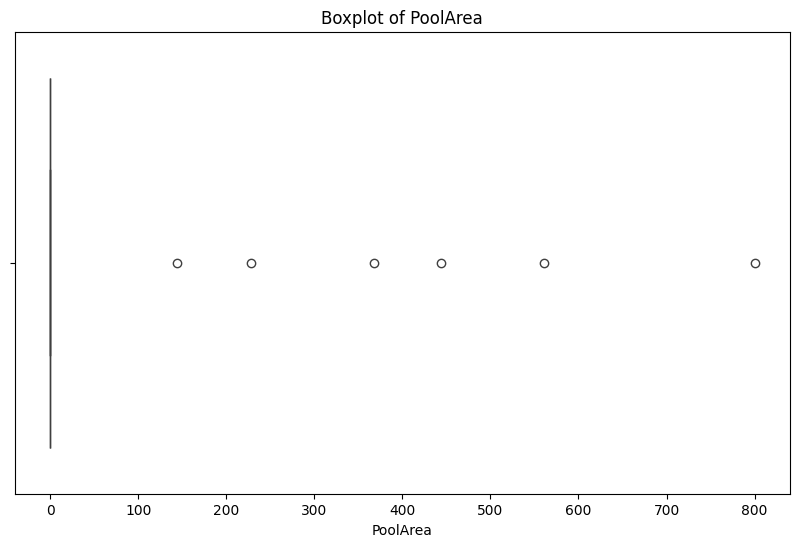

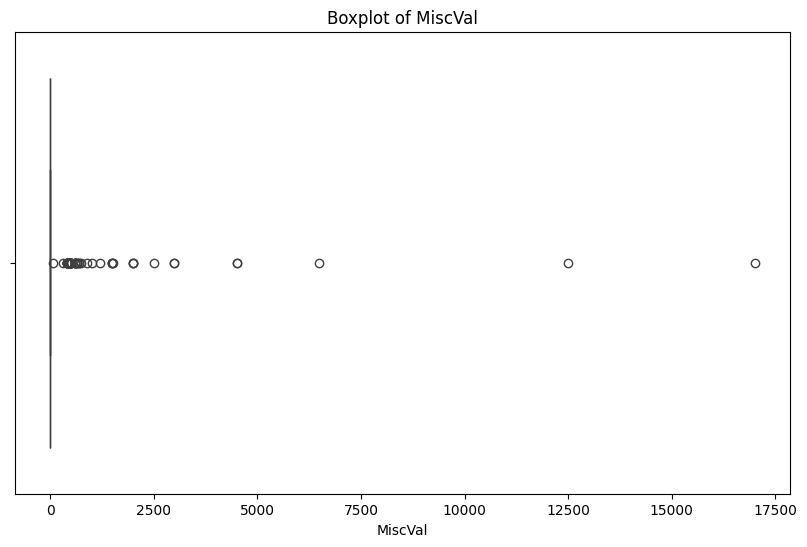

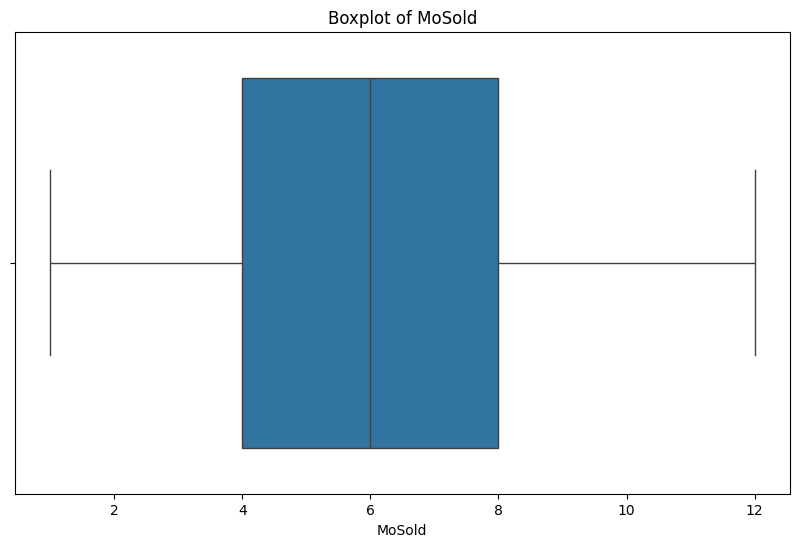

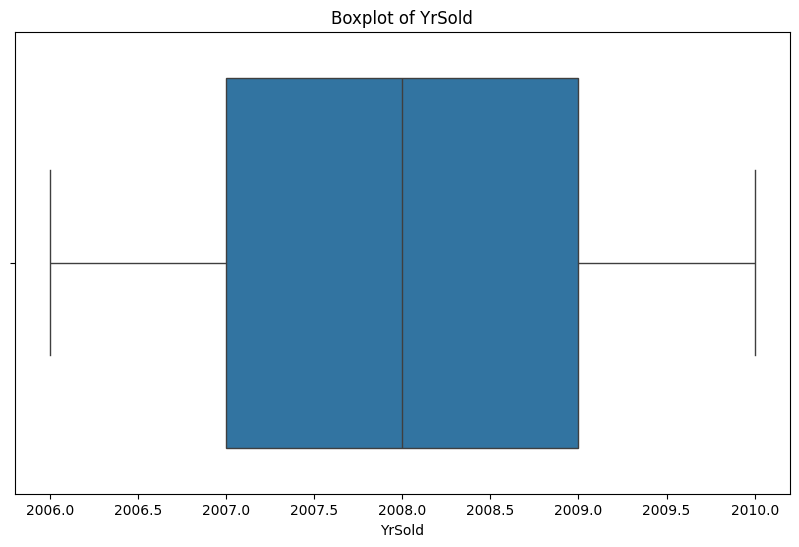

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

Identifikasi outlier menggunakan IQR

In [32]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

In [33]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

### Normalisasi dan Standardisasi Data

Standardisasi

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

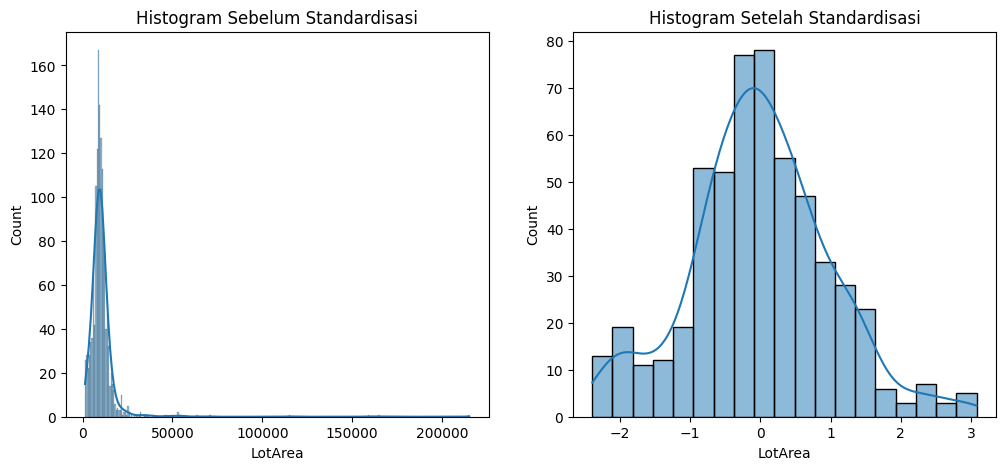

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

# Exploratory dan Explanatory Data Analysis

Menggunakan data yang telah melalui tahapan LabelEncoder (Bisa dengan One Hot Encoding)

In [36]:
df_lencoder.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  -1.768952    0.356986    -0.265012 -0.284244     0.614520    -0.523677   
2  -1.764179    0.356986    -0.037099  0.744924     0.614520    -0.523677   
4  -1.759405    0.356986     1.178437  1.851281     1.419903    -0.523677   
6  -1.754632   -0.917637     0.494698  0.316349     1.419903    -0.523677   
10 -1.745085   -0.917637     0.114843  0.726546    -0.996245    -0.523677   

    YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  KitchenQual  \
0    0.784193      0.704506    1.183911    0.639427  ...            2   
2    0.704296      0.653431    0.856804    0.101006  ...            2   
4    0.664347      0.551281    2.665515    0.514611  ...            2   
6    0.824141      0.806656    1.087703    2.262035  ...            2   
10  -0.733845     -1.236347   -0.701766    1.128902  ...            3   

    Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  \
0            4            2           0             1           2           3   
2            4            4           0             1           2           3   
4            4            4           0             1           2           3   
6            4            2           0             1           2           3   
10           4            2           3             2           2           3   

    PavedDrive  SaleType  SaleCondition  
0            2         8              3  
2            2         8              3  
4            2         8              3  
6            2         8              3  
10           2         8              3  

[5 rows x 77 columns]

Memeriksa kembali missing value pada dataset yang akan digunakan

In [37]:
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100
print(missing_percentage)

Id               0.0
MSSubClass       0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
                ... 
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
SaleCondition    0.0
Length: 77, dtype: float64


Analisis Deskriptif menggunakan histogram

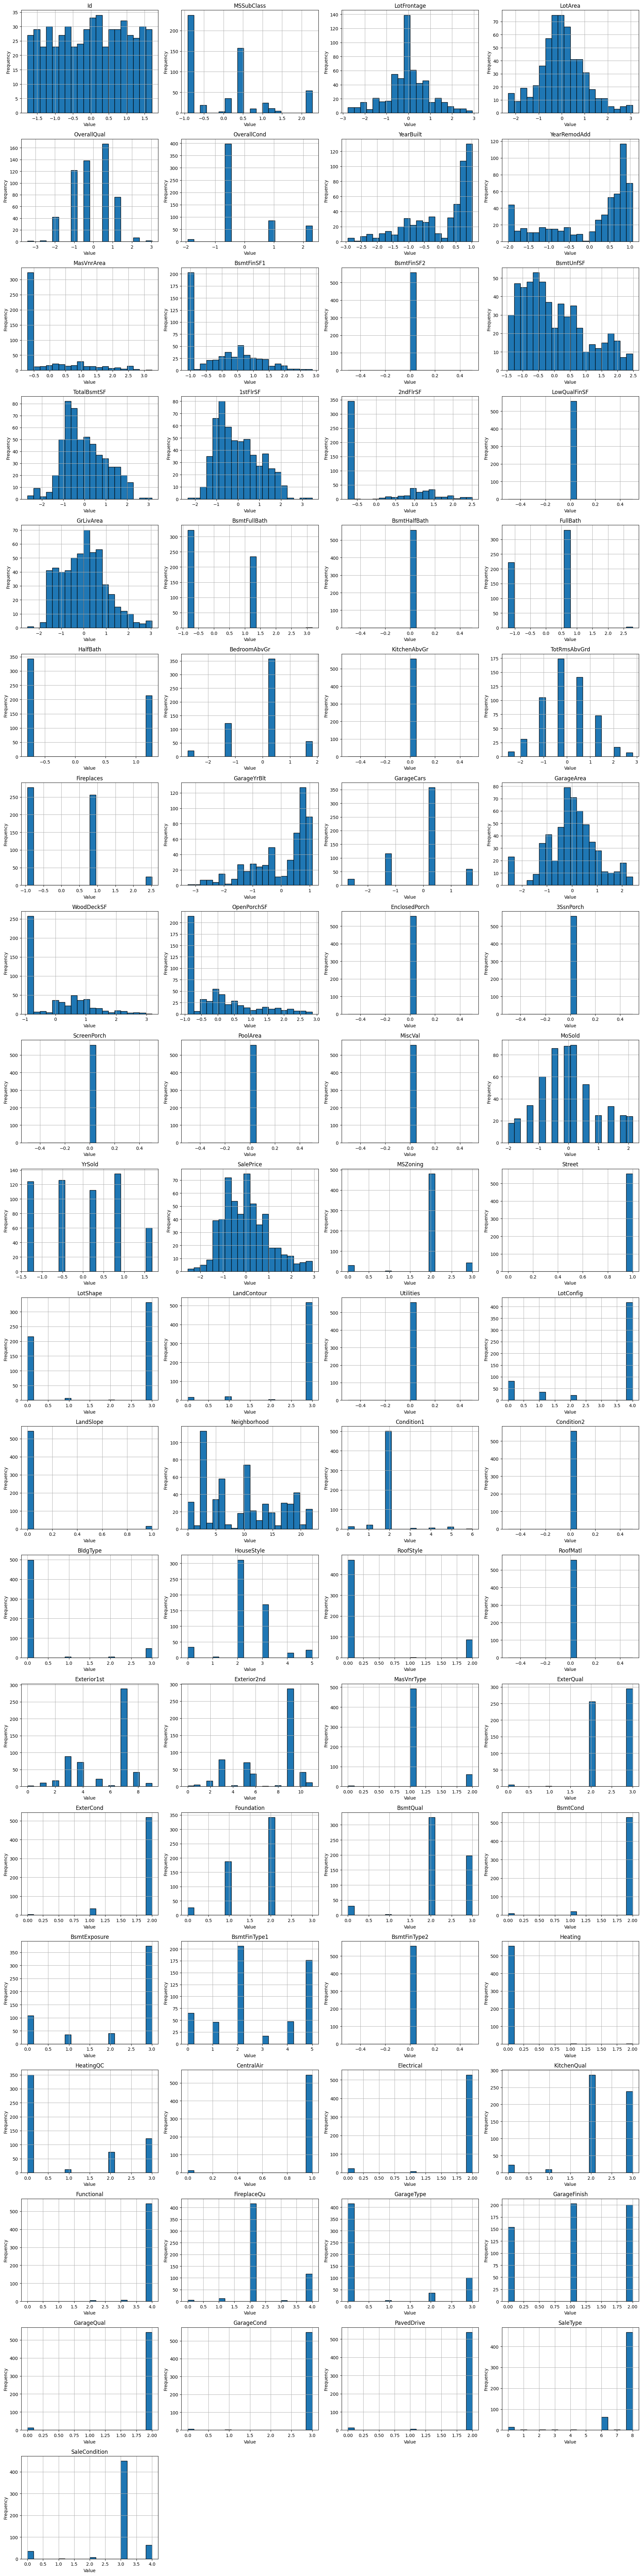

In [38]:
# Menghitung jumlah variabel
num_vars = df_lencoder.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

Visualisasi distrbusi beberapa kolom serta melihat korelasi antara variabel numerik

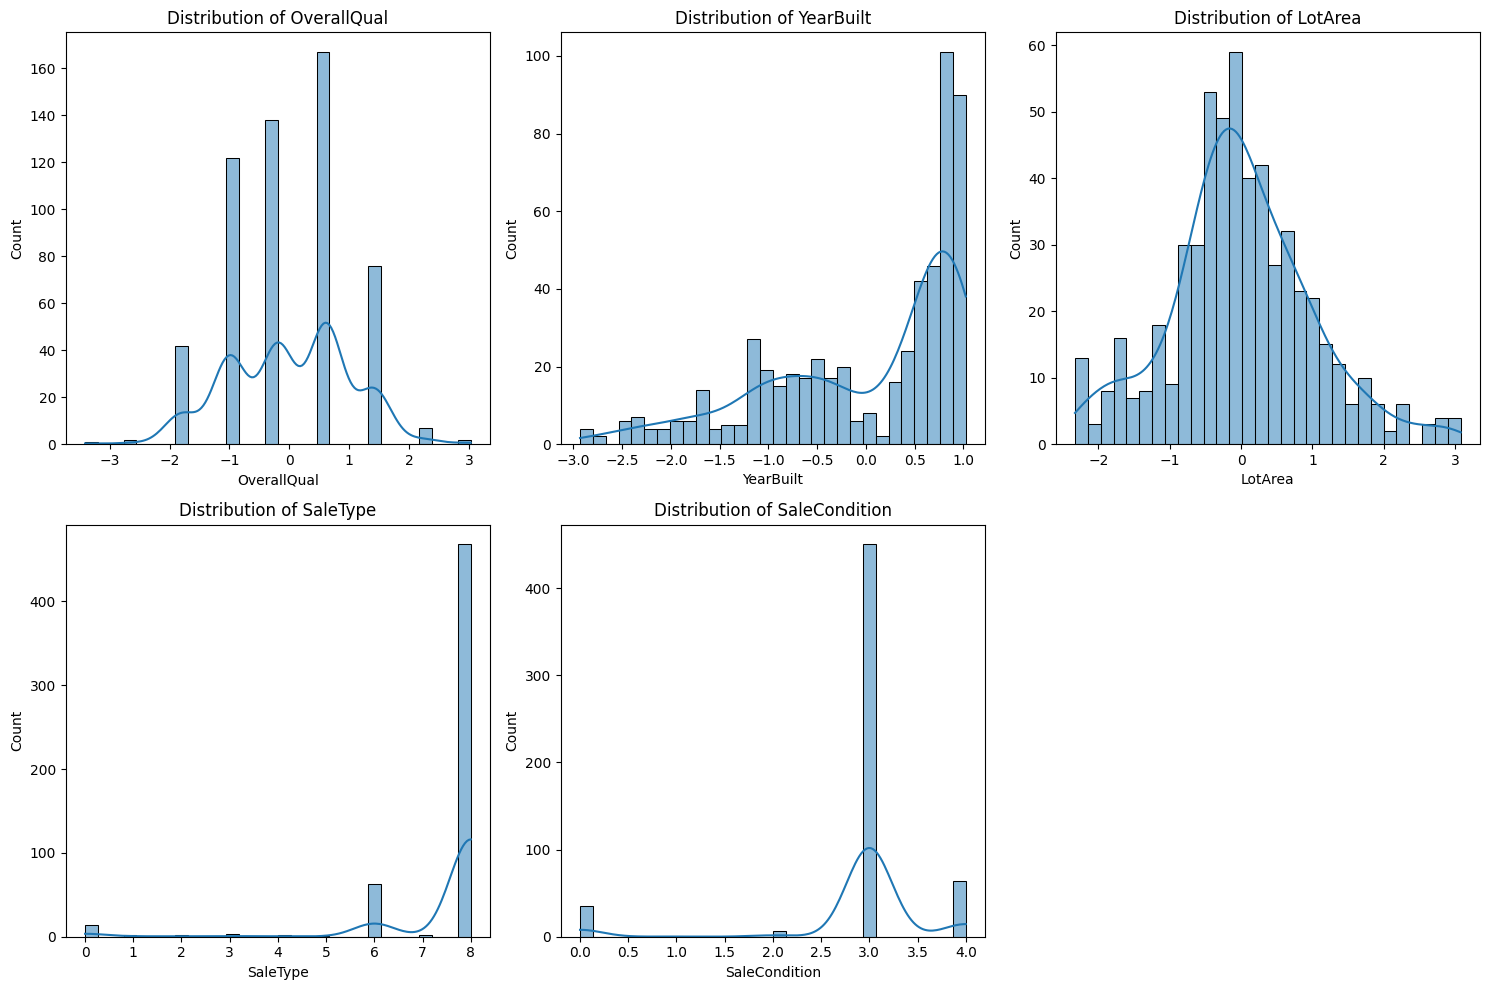

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Analisis Korelasi dengna Membuat Matriks Korelasi

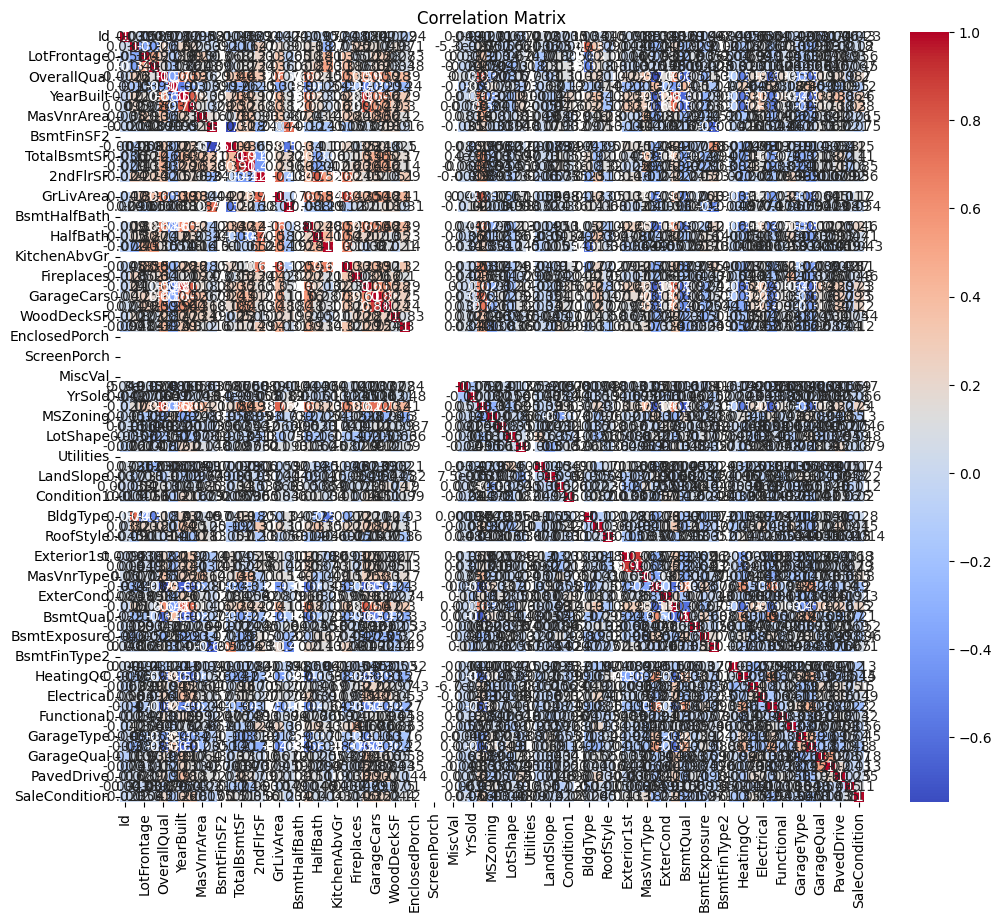

In [40]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Membuat matriks korelasi hanya terhadap variable atau fitur SalePrice sebagai gariable dependen

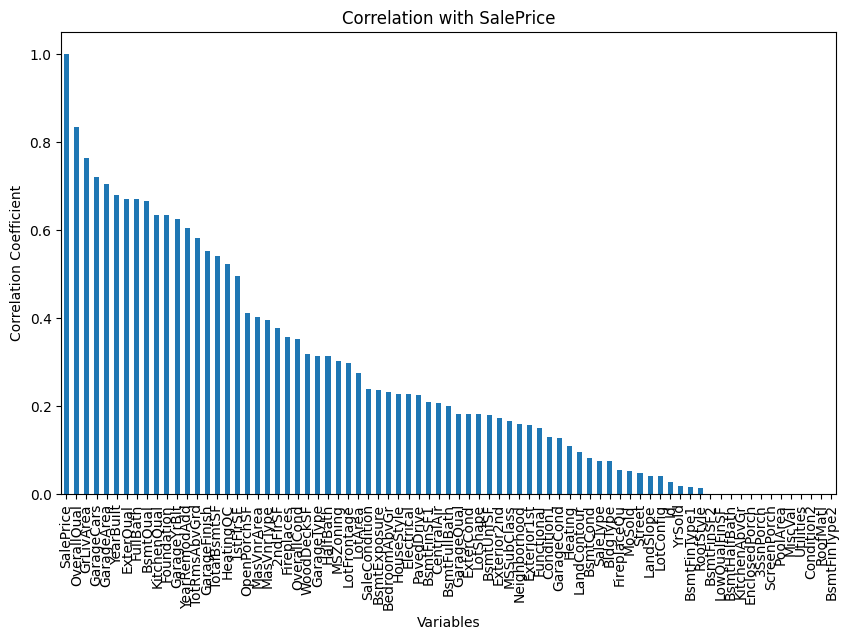

In [41]:
# Menghitung korelasi antara variabel taret dan semua variabel lainnya
target_corr = df_lencoder.corr()['SalePrice']

# (Opsional) Mengrutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# Menampilkan hasil korelasi
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

# Data Splitting

Import Library yang dibutuhkan

In [42]:
import sklearn

Memisahkan data yang akan dibagi (Berisi fitur (X) dan label/target (Y).

In [43]:
x  = df_lencoder.drop(columns=['SalePrice'])
y = df_lencoder['SalePrice']

Membagi menjadi empat bagian data

In [44]:
from os import X_OK
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Mengecek total jumlah data, jumlah data pada x_train, dan jumlah data pada x_test

In [45]:
# menghitung jumlah data
print("Jumlah data :",len(x))

# menghitung jumlah data pada x_train
print("Jumlah data pada x_train :",len(x_train))

# menghitung jumlah data pada x_test
print("Jumlah data pada x_test :",len(x_test))


Jumlah data : 557
Jumlah data pada x_train : 445
Jumlah data pada x_test : 112


# Modelling

## Melatih Model

Melati data dengan tiga algoritma yang berbeda

In [46]:
# Melatih model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

# Melatih model 3 dengan algortima Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184).fit(x_train, y_train)

## Evaluasi Model

Evaluasi menggunakan MAE, MSE dan R2 karena studi kasus kali ini adalah regresi.

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi pada model LARS
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

# Membuat dictionary untuk menyimpan hasil evaluasi
results_lars = {
    'MAE': mae_lars,
    'MSE': mse_lars,
    'R2': r2_lars
}

# konversi dictionary menjadi DataFrame
df_lars = pd.DataFrame(results_lars, index=['LARS'])
df_lars

MAE       MSE        R2
LARS  0.720054  0.817625 -0.018517

In [48]:
# Evaluasi Linear Regression
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

# Menambahkan hasil evaluasi LR ke DateFrame
df_lars.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]

# Menampilkan DataFrame
df_lars

MAE       MSE        R2
LARS               0.720054  0.817625 -0.018517
Linear Regression  0.237775  0.097490  0.878557

In [49]:
# Evaluasi pada model Linear Regression
pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

# Menambahkan hasil evaluasi GBR ke DateFrame
df_lars.loc['Gradient Boosting Regressor'] = [mae_GBR, mse_GBR, r2_GBR]

# Menampilkan DataFrame
df_lars


MAE       MSE        R2
LARS                         0.720054  0.817625 -0.018517
Linear Regression            0.237775  0.097490  0.878557
Gradient Boosting Regressor  0.217360  0.089055  0.889065

## Menyimpan Model

### Menggunakan Joblib untuk menyimpan model

In [50]:
import joblib

# Menyimpan model ke dalam file
joblib.dump(GBR, 'gbr_model.joblib')

['gbr_model.joblib']

# Deployment dan Monitoring

Memuat model

In [51]:
# Memuat model dari file joblib
joblib_model = joblib.load('gbr_model.joblib')


Membuat file dengan nama 'testing_deploy.py'
Taruh syntax di bawah ini ke dalam file tersebut, jangan lupa import joblib nya.



In [52]:
from flask import Flask, request, jsonify
import joblib

# Inisialisasi aplikasi Flask
app = Flask(__name__)

# Memuat model yang telah disimpan
joblib_model = joblib.load('gbr_model.joblib') # Pastikan path file sesuai dengan penyimpanan Anda

@app.route('/')
def home():
    return "Server is running!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['data']  # Mengambil data dari request JSON
    prediction = joblib_model.predict(data)  # Melakukan prediksi (harus dalam bentuk 2D array)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False, port=5050)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5050
INFO:werkzeug:Press CTRL+C to quit
